In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os,sys
#https://stackoverflow.com/questions/32085531/importing-a-csv-file-into-python-to-make-scatterplots-and-histograms

In [2]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [3]:
#read in the general csv too
#df_general  = pd.read_csv("/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/delta_scores.csv")

In [4]:
#read in the general csv too
df_general  = pd.read_csv("/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/antagonist_low_ddg_delta_scores.csv")

In [5]:
#get rid of weird 0 ddg values
df_general = df_general[df_general['ddg_compare'] != 0]

In [6]:
len(df_general)

13548099

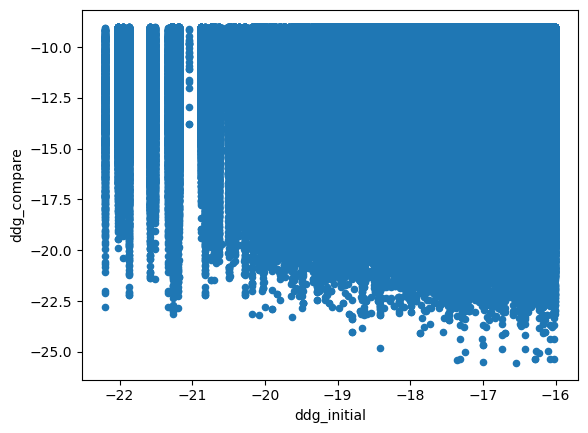

In [7]:
df_general.plot(kind='scatter',x='ddg_initial',y='ddg_compare')
plt.show()

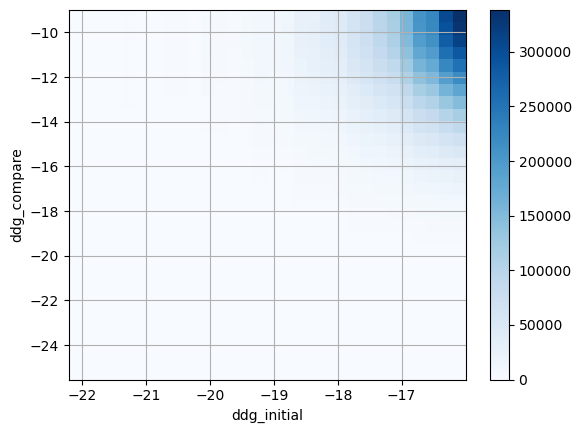

In [8]:
#Create heatmap of rmsds per system (n=85) between AutoDock and Rosetta Motifs
#Expanding x and y max to 10
#Using Blues color scale to allow for zeros to be white

x = df_general['ddg_initial']
y = df_general['ddg_compare']

heatmap, xedges, yedges = np.histogram2d(x, y, bins=(30, 30))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.xlabel('ddg_initial')
plt.ylabel('ddg_compare')

plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='Blues', aspect='auto')

plt.colorbar()

plt.grid(True)
plt.show()

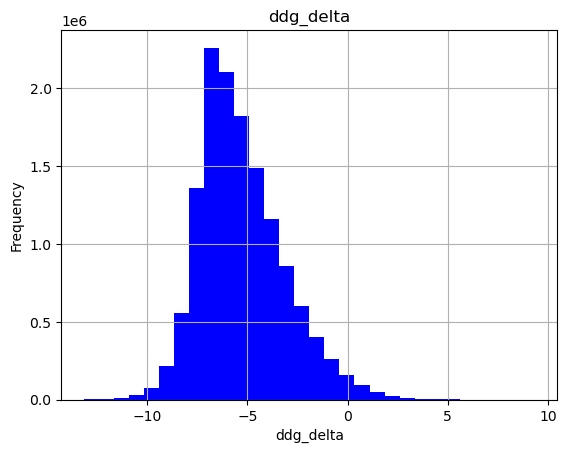

In [9]:
#plot the delta ddg in histogram
x = df_general['ddg_delta']
#set labels and title
plt.xlabel('ddg_delta')
plt.ylabel('Frequency')
plt.title('ddg_delta')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

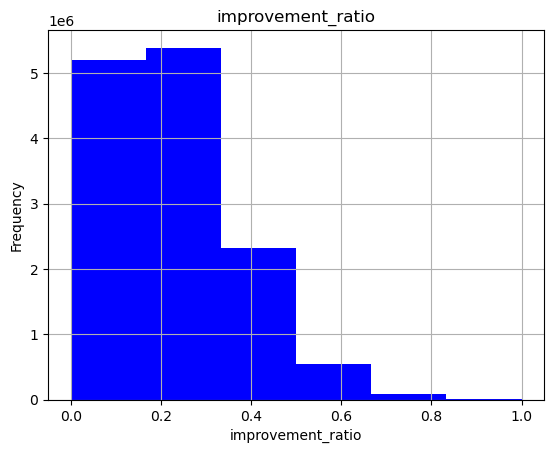

In [10]:
#plot the delta ddg in histogram
x = df_general['improvement_ratio']
#set labels and title
plt.xlabel('improvement_ratio')
plt.ylabel('Frequency')
plt.title('improvement_ratio')
#create 30 bin 1D hsitogram
plt.hist(x, bins=6, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [11]:
#filter down the general dataframe to only include placements where they meet the following criteria:
#rmsd < 6
#ddg_delta is positive
#real motif ratio is >= 0.5
#at least 3 rosetta hbonds
#ddg < -15
#
#
#

df_general_filtered = df_general[(df_general['hbond_motif_count_compare'] >= 3) & (df_general['rmsd'] <= 6) & (df_general['real_motif_ratio_compare'] >= 0.5) & (df_general['ddg_delta'] > -100) & (df_general['ddg_compare'] <= -7)]

In [12]:
df_general_filtered

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,rmsd,improvement_ratio,Unnamed: 34
24468,/scratch/abgvg9/discovery_results/antagonists/6273/placements/4s0v_receptor_only_PV-000239872975_4_7.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/PV-000239872975/placements/4s0v_receptor_only_PV-000239872975_160_4.pdb,-16.426413,-13.219772,-3.206641,8.0,10.0,-2.0,3.0,5.0,-2.0,0.250000,0.600,-0.350000,1,3,-2.0,-1.831582,-1.343848,-0.487734,100,100,0.0,0,0,0.0,0,0,0.0,93.992005,104.036380,-10.044375,2.886272,0.8,NaN
24806,/scratch/abgvg9/discovery_results/antagonists/6273/placements/4s0v_receptor_only_PV-000239872975_4_7.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/PV-000239872975/placements/4s0v_receptor_only_PV-000239872975_160_4.pdb,-16.426413,-13.219772,-3.206641,8.0,10.0,-2.0,3.0,5.0,-2.0,0.250000,0.600,-0.350000,1,3,-2.0,-1.831582,-1.343848,-0.487734,100,100,0.0,0,0,0.0,0,0,0.0,93.992005,104.036380,-10.044375,2.886272,0.8,NaN
31021,/scratch/abgvg9/discovery_results/antagonists/4876/placements/4s0v_receptor_only_PV-000284893433_3_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/PV-000284893433/placements/4s0v_receptor_only_PV-000284893433_105_4.pdb,-18.040646,-14.177990,-3.862656,7.0,10.0,-3.0,3.0,3.0,0.0,0.285714,0.500,-0.214286,2,3,-1.0,-2.556327,-1.735486,-0.820841,100,100,0.0,0,0,0.0,0,0,0.0,91.688741,100.586524,-8.897783,1.707185,0.6,NaN
31025,/scratch/abgvg9/discovery_results/antagonists/4876/placements/4s0v_receptor_only_PV-000284893433_3_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/PV-000284893433/placements/4s0v_receptor_only_PV-000284893433_130_1.pdb,-18.040646,-10.913240,-7.127406,7.0,10.0,-3.0,3.0,3.0,0.0,0.285714,0.500,-0.214286,2,3,-1.0,-2.556327,-0.680761,-1.875566,100,100,0.0,0,0,0.0,0,0,0.0,91.688741,104.905999,-13.217258,1.461192,0.6,NaN
31128,/scratch/abgvg9/discovery_results/antagonists/4876/placements/4s0v_receptor_only_PV-000284893433_3_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/PV-000284893433/placements/4s0v_receptor_only_PV-000284893433_133_3.pdb,-18.040646,-14.800065,-3.240581,7.0,8.0,-1.0,3.0,2.0,1.0,0.285714,0.500,-0.214286,2,3,-1.0,-2.556327,-1.568755,-0.987572,100,100,0.0,0,0,0.0,0,0,0.0,91.688741,97.131180,-5.442439,1.991430,0.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13537823,/scratch/abgvg9/discovery_results/antagonists/11388/placements/4s0v_receptor_only_Z939846528_5_2.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/Z939846528/placements/4s0v_receptor_only_Z939846528_183_3.pdb,-17.927406,-15.937570,-1.989836,6.0,8.0,-2.0,3.0,2.0,1.0,0.333333,0.625,-0.291667,2,3,-1.0,-1.346155,-2.018386,0.672231,100,100,0.0,0,0,0.0,0,0,0.0,92.059772,95.669044,-3.609272,1.084033,0.6,NaN
13542178,/scratch/abgvg9/discovery_results/antagonists/805/placements/4s0v_receptor_only_Z973436036_6_3.pdb,/scratch/abgvg9/discovery_results/redo_refined_p

In [13]:
len(df_general_filtered)

5580

In [14]:
#filter down the general dataframe to only include placements where they meet the following criteria:
#rmsd < 6
#ddg_delta is positive
#real motif ratio is >= 0.5
#at least 3 rosetta hbonds
#ddg < -15
#
#
#

df_general_filtered_lite = df_general[(df_general['real_motif_ratio_compare'] >= 0.5)]

In [15]:
df_general_filtered_lite

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,rmsd,improvement_ratio,Unnamed: 34
9,/scratch/abgvg9/discovery_results/antagonists/11790/placements/4s0v_receptor_only_PV-000233601229_13_3.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/PV-000233601229/placements/4s0v_receptor_only_PV-000233601229_71_4.pdb,-16.466857,-11.954463,-4.512394,8.0,8.0,0.0,3.0,1.0,2.0,0.25,0.500000,-0.250000,0,0,0.0,0.000000,0.000000,0.000000,100,100,0.0,0,0,0.0,0,0,0.0,94.783143,97.545537,-2.762394,3.324004,0.2,NaN
32,/scratch/abgvg9/discovery_results/antagonists/11790/placements/4s0v_receptor_only_PV-000233601229_13_3.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/PV-000233601229/placements/4s0v_receptor_only_PV-000233601229_57_51.pdb,-16.466857,-9.459936,-7.006921,8.0,6.0,2.0,3.0,1.0,2.0,0.25,0.500000,-0.250000,0,0,0.0,0.000000,0.000000,0.000000,100,100,0.0,0,0,0.0,0,0,0.0,94.783143,98.040064,-3.256921,4.672139,0.2,NaN
45,/scratch/abgvg9/discovery_results/antagonists/11790/placements/4s0v_receptor_only_PV-000233601229_13_3.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/PV-000233601229/placements/4s0v_receptor_only_PV-000233601229_44_0.pdb,-16.466857,-9.855239,-6.611618,8.0,11.0,-3.0,3.0,5.0,-2.0,0.25,0.545455,-0.295455,0,1,-1.0,0.000000,-0.556452,0.556452,100,100,0.0,0,0,0.0,0,0,0.0,94.783143,107.133764,-12.350621,4.429808,0.8,NaN
48,/scratch/abgvg9/discovery_results/antagonists/11790/placements/4s0v_receptor_only_PV-000233601229_13_3.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/PV-000233601229/placements/4s0v_receptor_only_PV-000233601229_26_8.pdb,-16.466857,-12.116196,-4.350661,8.0,7.0,1.0,3.0,1.0,2.0,0.25,0.571429,-0.321429,0,0,0.0,0.000000,0.000000,0.000000,100,100,0.0,0,0,0.0,0,0,0.0,94.783143,96.455233,-1.672090,3.391287,0.2,NaN
72,/scratch/abgvg9/discovery_results/antagonists/11790/placements/4s0v_receptor_only_PV-000233601229_13_3.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/PV-000233601229/placements/4s0v_receptor_only_PV-000233601229_56_52.pdb,-16.466857,-11.529381,-4.937476,8.0,12.0,-4.0,3.0,5.0,-2.0,0.25,0.500000,-0.250000,0,0,0.0,0.000000,0.000000,0.000000,100,100,0.0,0,0,0.0,0,0,0.0,94.783143,105.970619,-11.187476,7.144233,0.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13555188,/scratch/abgvg9/discovery_results/antagonists/11375/placements/4s0v_receptor_only_Z995840684_14_1.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/Z995840684/placements/4s0v_receptor_only_Z995840684_18_5.pdb,-16.030657,-9.043971,-6.986686,8.0,6.0,2.0,3.0,2.0,1.0,0.25,0.500000,-0.250000,2,0,2.0,-0.622226,0.000000,-0.622226,100,100,0.0,0,0,0.0,0,0,0.0,96.597117,99.456029,-2.858912,3.881750,0.2,NaN
13555229,/scratch/abgvg9/discovery_results/antagonists/11375/placements/4s0v_receptor_only_Z995840684_14_1.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagon

In [16]:
len(df_general_filtered_lite)

582110

In [17]:
#get a count on the number of placements that are very close to the original placement
df_recoveries = df_general

#get rid of weird 0 ddg values
df_recoveries = df_recoveries[df_recoveries['ddg_compare'] != 0]

df_recoveries = df_recoveries[df_recoveries['rmsd'] < 1]

In [18]:
len(df_recoveries)

68294

In [19]:
#aggregate by file_initial
closest_recovery_general_df = df_general.loc[df_general.groupby('file_initial')['rmsd'].idxmin()]

In [20]:
len(closest_recovery_general_df)

7217

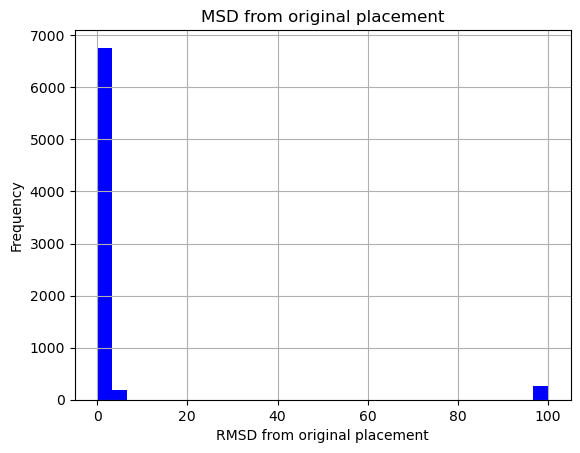

In [21]:
#plot the delta ddg in histogram
x = closest_recovery_general_df['rmsd']
#set labels and title
plt.xlabel('RMSD from original placement')
plt.ylabel('Frequency')
plt.title('MSD from original placement')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [22]:
systems_with_a_close_recovery_df = closest_recovery_general_df[closest_recovery_general_df['ddg_compare'] != 0]
systems_with_a_close_recovery_df = systems_with_a_close_recovery_df[systems_with_a_close_recovery_df['rmsd'] < 4]
len(systems_with_a_close_recovery_df)

6923

In [23]:
len(systems_with_a_close_recovery_df)/len(closest_recovery_general_df)

0.9592628516003879

In [24]:
systems_with_a_close_recovery_df

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,rmsd,improvement_ratio,Unnamed: 34
12649179,/scratch/abgvg9/discovery_results/antagonists/100/placements/4s0v_receptor_only_Z3472421949_4_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/Z3472421949/placements/4s0v_receptor_only_Z3472421949_1_1.pdb,-17.132893,-16.862061,-0.270832,8.0,8.0,0.0,4.0,4.0,0.0,0.250000,0.375000,-0.125000,4,4,0.0,-2.719481,-2.958399,0.238918,100,100,0.0,0,0,0.0,0,0,0.0,96.397626,96.554540,-0.156914,0.188057,0.2,NaN
12652991,/scratch/abgvg9/discovery_results/antagonists/100/placements/4s0v_receptor_only_Z3472421949_4_1.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/Z3472421949/placements/4s0v_receptor_only_Z3472421949_1_1.pdb,-18.526749,-16.862061,-1.664688,8.0,8.0,0.0,4.0,4.0,0.0,0.250000,0.375000,-0.125000,4,4,0.0,-3.237881,-2.958399,-0.279482,100,100,0.0,0,0,0.0,0,0,0.0,94.485370,96.554540,-2.069170,0.256264,0.2,NaN
6644816,/scratch/abgvg9/discovery_results/antagonists/10002/placements/4s0v_receptor_only_PV-005595072039_12_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/PV-005595072039/placements/4s0v_receptor_only_PV-005595072039_6_0.pdb,-16.099654,-9.141072,-6.958582,8.0,10.0,-2.0,4.0,1.0,3.0,0.250000,0.100000,0.150000,0,0,0.0,0.000000,0.000000,0.000000,100,100,0.0,0,0,0.0,0,0,0.0,96.150346,101.958928,-5.808582,3.522306,0.2,NaN
6657920,/scratch/abgvg9/discovery_results/antagonists/10005/placements/4s0v_receptor_only_PV-005597986868_15_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/PV-005597986868/placements/4s0v_receptor_only_PV-005597986868_20_13.pdb,-16.219546,-16.042707,-0.176839,6.0,7.0,-1.0,2.0,2.0,0.0,0.333333,0.285714,0.047619,1,1,0.0,-2.408971,-2.155094,-0.253877,100,100,0.0,0,0,0.0,0,0,0.0,90.704816,92.087913,-1.383097,0.190337,0.2,NaN
6654633,/scratch/abgvg9/discovery_results/antagonists/10005/placements/4s0v_receptor_only_PV-005597986868_15_11.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/PV-005597986868/placements/4s0v_receptor_only_PV-005597986868_20_0.pdb,-17.569806,-15.045962,-2.523844,6.0,6.0,0.0,2.0,2.0,0.0,0.333333,0.333333,0.000000,1,1,0.0,-2.346514,-2.153687,-0.192827,100,100,0.0,0,0,0.0,0,0,0.0,89.417013,92.133684,-2.716671,0.186601,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5701015,/scratch/abgvg9/discovery_results/antagonists/9384/placements/4s0v_receptor_only_PV-005081139196_2_8.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/PV-005081139196/placements/4s0v_receptor_only_PV-005081139196_4_7.pdb,-16.146294,-16.174989,0.028695,7.0,6.0,1.0,1.0,1.0,0.0,0.285714,0.500000,-0.214286,1,1,0.0,-0.391180,-0.486720,0.095540,100,100,0.0,0,0,0.0,0,0,0.0,92.748240,91.838291,0.909949,0.289629,0.4,NaN
5702058,/scratch/abgvg9/discovery_results/antagonists/9384/placements/4s0v_receptor_only_PV-005081524174_13_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_

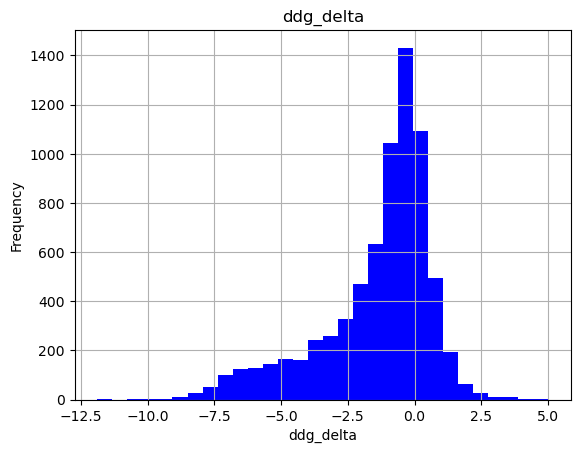

In [25]:
#plot the delta ddg in histogram
x = closest_recovery_general_df['ddg_delta']
#set labels and title
plt.xlabel('ddg_delta')
plt.ylabel('Frequency')
plt.title('ddg_delta')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [26]:
#grab the systems that did not recover and take a look
systems_without_a_close_recovery_df = closest_recovery_general_df[closest_recovery_general_df['ddg_compare'] != 0]
systems_without_a_close_recovery_df = systems_without_a_close_recovery_df[systems_without_a_close_recovery_df['rmsd'] > 4]
len(systems_without_a_close_recovery_df)

294

In [27]:
len(systems_without_a_close_recovery_df)/len(closest_recovery_general_df)

0.040737148399612025

In [28]:
systems_without_a_close_recovery_df

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,rmsd,improvement_ratio,Unnamed: 34
6699461,/scratch/abgvg9/discovery_results/antagonists/10025/placements/4s0v_receptor_only_PV-005614687577_7_1.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/PV-005614687577/placements/4s0v_receptor_only_PV-005614687577_111_2.pdb,-16.687062,-11.670124,-5.016938,8.0,6.0,2.0,5.0,2.0,3.0,0.250000,0.333333,-0.083333,1,0,1.0,-0.302973,0.000000,-0.302973,100,100,0.0,0,0,0.0,0,0,0.0,97.259965,96.663209,0.596756,100.000000,0.2,NaN
6816333,/scratch/abgvg9/discovery_results/antagonists/10085/placements/4s0v_receptor_only_PV-005663969167_9_3.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/PV-005663969167/placements/4s0v_receptor_only_PV-005663969167_128_1.pdb,-16.379374,-10.548398,-5.830976,8.0,8.0,0.0,4.0,2.0,2.0,0.250000,0.125000,0.125000,1,0,1.0,-1.020236,0.000000,-1.020236,100,100,0.0,0,0,0.0,0,0,0.0,95.850390,99.576602,-3.726212,100.000000,0.0,NaN
7026734,/scratch/abgvg9/discovery_results/antagonists/10165/placements/4s0v_receptor_only_PV-005730654308_4_1.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/PV-005730654308/placements/4s0v_receptor_only_PV-005730654308_197_7.pdb,-16.738211,-12.907797,-3.830414,9.0,9.0,0.0,6.0,4.0,2.0,0.333333,0.222222,0.111111,0,0,0.0,0.000000,0.000000,0.000000,100,100,0.0,0,0,0.0,0,0,0.0,98.595122,100.314425,-1.719303,100.000000,0.0,NaN
7125632,/scratch/abgvg9/discovery_results/antagonists/10201/placements/4s0v_receptor_only_PV-005760069497_1_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/PV-005760069497/placements/4s0v_receptor_only_PV-005760069497_106_1.pdb,-16.656310,-9.358089,-7.298221,9.0,9.0,0.0,3.0,4.0,-1.0,0.333333,0.111111,0.222222,0,1,-1.0,0.000000,-1.062422,1.062422,100,100,0.0,0,0,0.0,0,0,0.0,95.677023,103.690600,-8.013577,4.022819,0.4,NaN
7217321,/scratch/abgvg9/discovery_results/antagonists/10230/placements/4s0v_receptor_only_PV-005784404558_2_9.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/PV-005784404558/placements/4s0v_receptor_only_PV-005784404558_157_0.pdb,-16.104927,-9.219411,-6.885516,7.0,10.0,-3.0,4.0,4.0,0.0,0.285714,0.200000,0.085714,1,0,1.0,-1.070531,0.000000,-1.070531,100,100,0.0,0,0,0.0,0,0,0.0,95.110256,104.980589,-9.870333,100.000000,0.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691177,/scratch/abgvg9/discovery_results/antagonists/9239/placements/4s0v_receptor_only_PV-001410443349_11_6.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/PV-001410443349/placements/4s0v_receptor_only_PV-001410443349_58_7.pdb,-17.805266,-12.249321,-5.555945,8.0,8.0,0.0,2.0,4.0,-2.0,0.250000,0.125000,0.125000,1,0,1.0,-1.728255,0.000000,-1.728255,100,100,0.0,0,0,0.0,0,0,0.0,91.716479,99.875679,-8.159200,100.000000,0.2,NaN
5398820,/scratch/abgvg9/discovery_results/antagonists/9260/placements/4s0v_receptor_only_PV-004977296091_3_4.pdb,/scratch/abgvg9/disco

In [29]:
#get close rmsd placements with overall improvements
df_general_complete_improvements = df_general[(df_general['rmsd'] <= 6) & (df_general['improvement_ratio'] >= 1)]
len(df_general_complete_improvements)
df_general_complete_improvements

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,rmsd,improvement_ratio,Unnamed: 34
3649,/scratch/abgvg9/discovery_results/antagonists/11773/placements/4s0v_receptor_only_PV-000234654950_14_3.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/PV-000234654950/placements/4s0v_receptor_only_PV-000234654950_9_25.pdb,-16.183756,-16.469881,0.286125,7.0,9.0,-2.0,2.0,3.0,-1.0,0.285714,0.333333,-0.047619,0,1,-1.0,0.000000,-0.086765,0.086765,100,100,0.0,0,0,0.0,0,0,0.0,93.101958,96.776687,-3.674729,1.249788,1.0,NaN
5078,/scratch/abgvg9/discovery_results/antagonists/11773/placements/4s0v_receptor_only_PV-000234654950_14_3.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/PV-000234654950/placements/4s0v_receptor_only_PV-000234654950_9_25.pdb,-16.183756,-16.469881,0.286125,7.0,9.0,-2.0,2.0,3.0,-1.0,0.285714,0.333333,-0.047619,0,1,-1.0,0.000000,-0.086765,0.086765,100,100,0.0,0,0,0.0,0,0,0.0,93.101958,96.776687,-3.674729,1.249788,1.0,NaN
23362,/scratch/abgvg9/discovery_results/antagonists/5372/placements/4s0v_receptor_only_PV-000239870270_12_8.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/PV-000239870270/placements/4s0v_receptor_only_PV-000239870270_167_4.pdb,-17.193058,-17.718071,0.525013,8.0,11.0,-3.0,4.0,5.0,-1.0,0.250000,0.454545,-0.204545,1,2,-1.0,-1.732903,-1.337360,-0.395543,100,100,0.0,0,0,0.0,0,0,0.0,94.324039,99.399114,-5.075075,2.943592,1.0,NaN
23868,/scratch/abgvg9/discovery_results/antagonists/5372/placements/4s0v_receptor_only_PV-000239870270_12_10.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/PV-000239870270/placements/4s0v_receptor_only_PV-000239870270_153_1.pdb,-16.760409,-16.889929,0.129520,8.0,11.0,-3.0,4.0,5.0,-1.0,0.250000,0.363636,-0.113636,1,3,-2.0,-2.108631,-1.240835,-0.867796,100,100,0.0,0,0,0.0,0,0,0.0,94.380960,101.232872,-6.851912,2.782231,1.0,NaN
23974,/scratch/abgvg9/discovery_results/antagonists/5372/placements/4s0v_receptor_only_PV-000239870270_12_10.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/PV-000239870270/placements/4s0v_receptor_only_PV-000239870270_153_0.pdb,-16.760409,-16.836253,0.075844,8.0,13.0,-5.0,4.0,5.0,-1.0,0.250000,0.384615,-0.134615,1,2,-1.0,-2.108631,-0.937728,-1.170903,100,100,0.0,0,0,0.0,0,0,0.0,94.380960,102.610634,-8.229674,2.639143,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13552337,/scratch/abgvg9/discovery_results/antagonists/11392/placements/4s0v_receptor_only_Z99188459_6_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/Z99188459/placements/4s0v_receptor_only_Z99188459_113_24.pdb,-16.080706,-16.260341,0.179635,8.0,9.0,-1.0,2.0,4.0,-2.0,0.250000,0.333333,-0.083333,1,2,-1.0,-0.915344,-1.412657,0.497313,100,100,0.0,0,0,0.0,0,0,0.0,94.253950,97.660335,-3.406385,3.728092,1.0,NaN
13553245,/scratch/abgvg9/discovery_results/antagonists/6573/placements/4s0v_receptor_only_Z99230950_1_4.pdb,/scratch/abgvg9/discovery_results/redo_

In [30]:
#get close rmsd placements with overall improvements
df_general_0_8_improvements = df_general[(df_general['rmsd'] <= 6) & (df_general['improvement_ratio'] >= 0.8)]
len(df_general_0_8_improvements)
df_general_0_8_improvements

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,rmsd,improvement_ratio,Unnamed: 34
45,/scratch/abgvg9/discovery_results/antagonists/11790/placements/4s0v_receptor_only_PV-000233601229_13_3.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/PV-000233601229/placements/4s0v_receptor_only_PV-000233601229_44_0.pdb,-16.466857,-9.855239,-6.611618,8.0,11.0,-3.0,3.0,5.0,-2.0,0.25,0.545455,-0.295455,0,1,-1.0,0.000000,-0.556452,0.556452,100,100,0.0,0,0,0.0,0,0,0.0,94.783143,107.133764,-12.350621,4.429808,0.8,NaN
275,/scratch/abgvg9/discovery_results/antagonists/11790/placements/4s0v_receptor_only_PV-000233601229_13_3.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/PV-000233601229/placements/4s0v_receptor_only_PV-000233601229_26_19.pdb,-16.466857,-14.805441,-1.661416,8.0,11.0,-3.0,3.0,5.0,-2.0,0.25,0.272727,-0.022727,0,1,-1.0,0.000000,-0.466624,0.466624,100,100,0.0,0,0,0.0,0,0,0.0,94.783143,102.000662,-7.217519,3.662784,0.8,NaN
294,/scratch/abgvg9/discovery_results/antagonists/11790/placements/4s0v_receptor_only_PV-000233601229_13_3.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/PV-000233601229/placements/4s0v_receptor_only_PV-000233601229_20_6.pdb,-16.466857,-10.311383,-6.155474,8.0,11.0,-3.0,3.0,4.0,-1.0,0.25,0.454545,-0.204545,0,1,-1.0,0.000000,-0.713179,0.713179,100,100,0.0,0,0,0.0,0,0,0.0,94.783143,105.429983,-10.646840,4.809019,0.8,NaN
358,/scratch/abgvg9/discovery_results/antagonists/11790/placements/4s0v_receptor_only_PV-000233601229_13_3.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/PV-000233601229/placements/4s0v_receptor_only_PV-000233601229_44_38.pdb,-16.466857,-16.616053,0.149196,8.0,11.0,-3.0,3.0,2.0,1.0,0.25,0.363636,-0.113636,0,1,-1.0,0.000000,-1.253528,1.253528,100,100,0.0,0,0,0.0,0,0,0.0,94.783143,96.494055,-1.710912,5.369781,0.8,NaN
364,/scratch/abgvg9/discovery_results/antagonists/11790/placements/4s0v_receptor_only_PV-000233601229_13_3.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/PV-000233601229/placements/4s0v_receptor_only_PV-000233601229_43_4.pdb,-16.466857,-17.220851,0.753994,8.0,8.0,0.0,3.0,4.0,-1.0,0.25,0.500000,-0.250000,0,2,-2.0,0.000000,-1.744721,1.744721,100,100,0.0,0,0,0.0,0,0,0.0,94.783143,95.534428,-0.751285,2.457020,0.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13554527,/scratch/abgvg9/discovery_results/antagonists/6596/placements/4s0v_receptor_only_Z99486851_15_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/Z99486851/placements/4s0v_receptor_only_Z99486851_22_6.pdb,-16.193649,-18.391036,2.197387,8.0,11.0,-3.0,2.0,6.0,-4.0,0.25,0.363636,-0.113636,1,0,1.0,-0.166812,0.000000,-0.166812,100,100,0.0,0,0,0.0,0,0,0.0,94.889539,98.972600,-4.083061,4.432855,0.8,NaN
13554528,/scratch/abgvg9/discovery_results/antagonists/6596/placements/4s0v_receptor_only_Z99486851_15_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real

In [31]:
#get close rmsd placements with overall improvements
df_general_high_hbonds = df_general[(df_general['rmsd'] <= 4) & (df_general['hbond_motif_count_delta'] <= -1) & (df_general['hbond_motif_count_compare'] >= 3) & (df_general['ddg_delta'] >= 0) & (df_general['ddg_compare'] <= -18) & (df_general['real_motif_ratio_compare'] >= 0.25)]
len(df_general_high_hbonds)


467

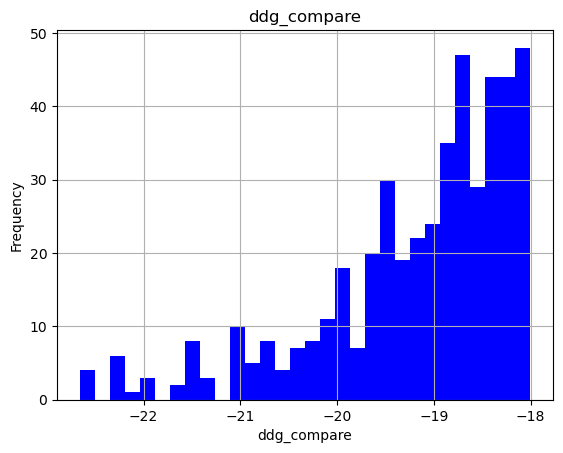

In [32]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['ddg_compare']
#set labels and title
plt.xlabel('ddg_compare')
plt.ylabel('Frequency')
plt.title('ddg_compare')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [33]:
df_general_high_hbonds

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,rmsd,improvement_ratio,Unnamed: 34
268943,/scratch/abgvg9/discovery_results/antagonists/5837/placements/4s0v_receptor_only_PV-000538661374_4_1.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/PV-000538661374/placements/4s0v_receptor_only_PV-000538661374_76_3.pdb,-16.181013,-19.520224,3.339211,8.0,11.0,-3.0,5.0,5.0,0.0,0.250000,0.272727,-0.022727,1,3,-2.0,-0.796178,-2.036418,1.240240,100,100,0.0,0,0,0.0,0,0,0.0,97.272809,97.716085,-0.443276,2.706914,0.8,NaN
369645,/scratch/abgvg9/discovery_results/antagonists/11936/placements/4s0v_receptor_only_PV-000555056414_11_3.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/PV-000555056414/placements/4s0v_receptor_only_PV-000555056414_167_4.pdb,-16.460049,-18.293187,1.833138,8.0,11.0,-3.0,4.0,6.0,-2.0,0.250000,0.272727,-0.022727,2,3,-1.0,-1.473805,-2.233524,0.759719,100,100,0.0,0,0,0.0,0,0,0.0,96.316146,99.746016,-3.429870,1.246551,1.0,NaN
370198,/scratch/abgvg9/discovery_results/antagonists/11936/placements/4s0v_receptor_only_PV-000555056414_11_3.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/PV-000555056414/placements/4s0v_receptor_only_PV-000555056414_167_4.pdb,-16.460049,-18.293187,1.833138,8.0,11.0,-3.0,4.0,6.0,-2.0,0.250000,0.272727,-0.022727,2,3,-1.0,-1.473805,-2.233524,0.759719,100,100,0.0,0,0,0.0,0,0,0.0,96.316146,99.746016,-3.429870,1.246551,1.0,NaN
377223,/scratch/abgvg9/discovery_results/antagonists/4435/placements/4s0v_receptor_only_PV-000555062637_11_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/PV-000555062637/placements/4s0v_receptor_only_PV-000555062637_16_10.pdb,-17.050755,-18.543149,1.492394,8.0,10.0,-2.0,5.0,4.0,1.0,0.250000,0.300000,-0.050000,2,3,-1.0,-1.173343,-3.023737,1.850394,100,100,0.0,0,0,0.0,0,0,0.0,97.025902,95.733114,1.292788,2.450009,0.8,NaN
377746,/scratch/abgvg9/discovery_results/antagonists/4435/placements/4s0v_receptor_only_PV-000555062637_11_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/PV-000555062637/placements/4s0v_receptor_only_PV-000555062637_16_12.pdb,-17.050755,-18.557800,1.507045,8.0,8.0,0.0,5.0,4.0,1.0,0.250000,0.375000,-0.125000,2,3,-1.0,-1.173343,-2.577193,1.403850,100,100,0.0,0,0,0.0,0,0,0.0,97.025902,94.240007,2.785895,2.108851,0.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13457764,/scratch/abgvg9/discovery_results/antagonists/1491/placements/4s0v_receptor_only_Z741186566_15_6.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_low_ddg/Z741186566/placements/4s0v_receptor_only_Z741186566_82_12.pdb,-16.302399,-18.099195,1.796796,6.0,7.0,-1.0,2.0,1.0,1.0,0.500000,0.285714,0.214286,2,3,-1.0,-1.689511,-2.073830,0.384319,100,100,0.0,0,0,0.0,0,0,0.0,92.508090,91.112689,1.395401,1.677635,0.6,NaN
13460025,/scratch/abgvg9/discovery_results/antagonists/1491/placements/4s0v_receptor_only_Z741186566_15_3.pdb,/scratch/abgvg9/discovery_results/redo_re

In [34]:
len(df_general_high_hbonds)

467

In [35]:
# Extract ligand names using a regular expression
df_general_high_hbonds['ligand_name'] = df_general_high_hbonds['file_compare'].str.extract(r'4s0v_receptor_only_(.+?)_\d+_\d+\.pdb')

# Find the unique ligand names and their count
unique_ligands = df_general_high_hbonds['ligand_name'].unique()
num_unique_ligands = len(unique_ligands)

# Display the unique ligand names and the count
print("Unique Ligand Names:", unique_ligands)
print("Number of Unique Ligands:", num_unique_ligands)

Unique Ligand Names: ['PV-000538661374' 'PV-000555056414' 'PV-000555062637' 'PV-000555101582'
 'PV-000555266033' 'PV-000555995079' 'PV-000555996188' 'PV-000556085434'
 'PV-000574352410' 'PV-001042830509' 'PV-001189669321' 'PV-001566826299'
 'PV-001790934432' 'PV-002182191204' 'PV-002353454027' 'PV-002738102521'
 'PV-002750714394' 'PV-003064601637' 'PV-003148995569' 'PV-003239324501'
 'PV-003345920687' 'PV-003461358092' 'PV-003481999522' 'PV-003657695826'
 'PV-003790498879' 'PV-004156311929' 'PV-004185465594' 'PV-004283803145'
 'PV-004309183058' 'PV-004314341404' 'PV-004318818801' 'PV-004387661655'
 'PV-004404150802' 'PV-004455271886' 'PV-004495267170' 'PV-004504184115'
 'PV-004509628975' 'PV-004538332691' 'PV-004545227678' 'PV-004559340445'
 'PV-004565289367' 'PV-004590143981' 'PV-004632151949' 'PV-004635001835'
 'PV-004647103010' 'PV-004653864397' 'PV-004667420170' 'PV-004736035082'
 'PV-004747741873' 'PV-004777589685' 'PV-004830127900' 'PV-004833489258'
 'PV-004860417790' 'PV-0049020

/scratch/local/ipykernel_139209/2743136754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_general_high_hbonds['ligand_name'] = df_general_high_hbonds['file_compare'].str.extract(r'4s0v_receptor_only_(.+?)_\d+_\d+\.pdb')


In [36]:
"""
for i in df_general_high_hbonds['file_initial']:
    #print(i['file_initial'], i['file_compare'])
    print("cp " + i + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements")
"""

'\nfor i in df_general_high_hbonds[\'file_initial\']:\n    #print(i[\'file_initial\'], i[\'file_compare\'])\n    print("cp " + i + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements")\n'

In [37]:
line_counter = 0
folder_counter = 0

destination = "/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg"
if destination.endswith("/") == False:
    destination = destination + "/"

for index, row in df_general_high_hbonds.iterrows():
    
    #make a string of line counter to be 5 digits long
    my_str = str(line_counter)
    while len(my_str) < 5:
        my_str = "0" + my_str
    
    os.system("mkdir " + destination + str(folder_counter))
    #print("cp " + row['file_initial'] + " " + row['file_compare'] + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/" + str(folder_counter))
    
    new_init = my_str + "_initial_" + row['file_initial'].split("/")[len(row['file_initial'].split("/")) - 1]
    new_comp = my_str + "_compare_" + row['file_compare'].split("/")[len(row['file_compare'].split("/")) - 1]
    
    print(new_init, new_comp)
    
    #os.system("cp " + row['file_initial'] + " " + row['file_compare'] + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/" + str(folder_counter))
    os.system("cp " + row['file_initial'] + " " + destination + str(folder_counter) + "/" + new_init)
    os.system("cp " + row['file_compare'] + " " + destination + str(folder_counter) + "/" + new_comp)
    os.system("sleep 0.1")
    
    line_counter = line_counter + 1
    
    if line_counter % 50 == 0:
        folder_counter = folder_counter + 1
        
#write the df_general_high_hbonds to csv
df_general_high_hbonds.to_csv(destination + 'antagonist_low_ddg_best_improved_placements_sheet.csv', index=False)

mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00000_initial_4s0v_receptor_only_PV-000538661374_4_1.pdb 00000_compare_4s0v_receptor_only_PV-000538661374_76_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00001_initial_4s0v_receptor_only_PV-000555056414_11_3.pdb 00001_compare_4s0v_receptor_only_PV-000555056414_167_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00002_initial_4s0v_receptor_only_PV-000555056414_11_3.pdb 00002_compare_4s0v_receptor_only_PV-000555056414_167_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00003_initial_4s0v_receptor_only_PV-000555062637_11_0.pdb 00003_compare_4s0v_receptor_only_PV-000555062637_16_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00004_initial_4s0v_receptor_only_PV-000555062637_11_0.pdb 00004_compare_4s0v_receptor_only_PV-000555062637_16_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00005_initial_4s0v_receptor_only_PV-000555062637_11_0.pdb 00005_compare_4s0v_receptor_only_PV-000555062637_16_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00006_initial_4s0v_receptor_only_PV-000555101582_2_4.pdb 00006_compare_4s0v_receptor_only_PV-000555101582_89_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00007_initial_4s0v_receptor_only_PV-000555101582_2_4.pdb 00007_compare_4s0v_receptor_only_PV-000555101582_89_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00008_initial_4s0v_receptor_only_PV-000555266033_4_7.pdb 00008_compare_4s0v_receptor_only_PV-000555266033_94_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00009_initial_4s0v_receptor_only_PV-000555995079_11_0.pdb 00009_compare_4s0v_receptor_only_PV-000555995079_48_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00010_initial_4s0v_receptor_only_PV-000555995079_10_6.pdb 00010_compare_4s0v_receptor_only_PV-000555995079_48_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00011_initial_4s0v_receptor_only_PV-000555995079_11_0.pdb 00011_compare_4s0v_receptor_only_PV-000555995079_48_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00012_initial_4s0v_receptor_only_PV-000555995079_10_6.pdb 00012_compare_4s0v_receptor_only_PV-000555995079_48_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00013_initial_4s0v_receptor_only_PV-000555996188_11_1.pdb 00013_compare_4s0v_receptor_only_PV-000555996188_20_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00014_initial_4s0v_receptor_only_PV-000555996188_11_1.pdb 00014_compare_4s0v_receptor_only_PV-000555996188_20_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00015_initial_4s0v_receptor_only_PV-000556085434_9_5.pdb 00015_compare_4s0v_receptor_only_PV-000556085434_14_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00016_initial_4s0v_receptor_only_PV-000556085434_9_5.pdb 00016_compare_4s0v_receptor_only_PV-000556085434_14_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00017_initial_4s0v_receptor_only_PV-000574352410_12_2.pdb 00017_compare_4s0v_receptor_only_PV-000574352410_14_16.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00018_initial_4s0v_receptor_only_PV-001042830509_10_0.pdb 00018_compare_4s0v_receptor_only_PV-001042830509_6_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00019_initial_4s0v_receptor_only_PV-001189669321_1_0.pdb 00019_compare_4s0v_receptor_only_PV-001189669321_1_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00020_initial_4s0v_receptor_only_PV-001189669321_1_0.pdb 00020_compare_4s0v_receptor_only_PV-001189669321_2_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00021_initial_4s0v_receptor_only_PV-001189669321_1_0.pdb 00021_compare_4s0v_receptor_only_PV-001189669321_83_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00022_initial_4s0v_receptor_only_PV-001189669321_1_0.pdb 00022_compare_4s0v_receptor_only_PV-001189669321_24_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00023_initial_4s0v_receptor_only_PV-001189669321_1_0.pdb 00023_compare_4s0v_receptor_only_PV-001189669321_39_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00024_initial_4s0v_receptor_only_PV-001189669321_1_0.pdb 00024_compare_4s0v_receptor_only_PV-001189669321_1_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00025_initial_4s0v_receptor_only_PV-001189669321_1_0.pdb 00025_compare_4s0v_receptor_only_PV-001189669321_2_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00026_initial_4s0v_receptor_only_PV-001189669321_1_0.pdb 00026_compare_4s0v_receptor_only_PV-001189669321_83_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00027_initial_4s0v_receptor_only_PV-001189669321_1_0.pdb 00027_compare_4s0v_receptor_only_PV-001189669321_24_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00028_initial_4s0v_receptor_only_PV-001566826299_4_0.pdb 00028_compare_4s0v_receptor_only_PV-001566826299_103_15.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00029_initial_4s0v_receptor_only_PV-001566826299_4_0.pdb 00029_compare_4s0v_receptor_only_PV-001566826299_103_15.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00030_initial_4s0v_receptor_only_PV-001790934432_6_0.pdb 00030_compare_4s0v_receptor_only_PV-001790934432_42_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00031_initial_4s0v_receptor_only_PV-001790934432_6_0.pdb 00031_compare_4s0v_receptor_only_PV-001790934432_42_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00032_initial_4s0v_receptor_only_PV-002182191204_1_3.pdb 00032_compare_4s0v_receptor_only_PV-002182191204_24_13.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00033_initial_4s0v_receptor_only_PV-002353454027_8_2.pdb 00033_compare_4s0v_receptor_only_PV-002353454027_88_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00034_initial_4s0v_receptor_only_PV-002353454027_8_2.pdb 00034_compare_4s0v_receptor_only_PV-002353454027_88_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00035_initial_4s0v_receptor_only_PV-002738102521_5_2.pdb 00035_compare_4s0v_receptor_only_PV-002738102521_18_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00036_initial_4s0v_receptor_only_PV-002738102521_5_2.pdb 00036_compare_4s0v_receptor_only_PV-002738102521_18_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00037_initial_4s0v_receptor_only_PV-002750714394_13_6.pdb 00037_compare_4s0v_receptor_only_PV-002750714394_4_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00038_initial_4s0v_receptor_only_PV-002750714394_13_6.pdb 00038_compare_4s0v_receptor_only_PV-002750714394_4_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00039_initial_4s0v_receptor_only_PV-003064601637_7_4.pdb 00039_compare_4s0v_receptor_only_PV-003064601637_179_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00040_initial_4s0v_receptor_only_PV-003064601637_7_4.pdb 00040_compare_4s0v_receptor_only_PV-003064601637_70_28.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00041_initial_4s0v_receptor_only_PV-003064601637_7_4.pdb 00041_compare_4s0v_receptor_only_PV-003064601637_155_26.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00042_initial_4s0v_receptor_only_PV-003064601637_7_4.pdb 00042_compare_4s0v_receptor_only_PV-003064601637_181_11.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00043_initial_4s0v_receptor_only_PV-003064601637_7_4.pdb 00043_compare_4s0v_receptor_only_PV-003064601637_68_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00044_initial_4s0v_receptor_only_PV-003064601637_7_4.pdb 00044_compare_4s0v_receptor_only_PV-003064601637_30_17.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00045_initial_4s0v_receptor_only_PV-003064601637_7_4.pdb 00045_compare_4s0v_receptor_only_PV-003064601637_179_16.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00046_initial_4s0v_receptor_only_PV-003064601637_7_4.pdb 00046_compare_4s0v_receptor_only_PV-003064601637_81_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00047_initial_4s0v_receptor_only_PV-003064601637_7_4.pdb 00047_compare_4s0v_receptor_only_PV-003064601637_81_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00048_initial_4s0v_receptor_only_PV-003064601637_7_4.pdb 00048_compare_4s0v_receptor_only_PV-003064601637_179_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/0’: File exists


00049_initial_4s0v_receptor_only_PV-003064601637_7_4.pdb 00049_compare_4s0v_receptor_only_PV-003064601637_30_17.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00050_initial_4s0v_receptor_only_PV-003148995569_6_8.pdb 00050_compare_4s0v_receptor_only_PV-003148995569_13_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00051_initial_4s0v_receptor_only_PV-003148995569_6_2.pdb 00051_compare_4s0v_receptor_only_PV-003148995569_13_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00052_initial_4s0v_receptor_only_PV-003148995569_6_8.pdb 00052_compare_4s0v_receptor_only_PV-003148995569_13_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00053_initial_4s0v_receptor_only_PV-003148995569_6_2.pdb 00053_compare_4s0v_receptor_only_PV-003148995569_13_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00054_initial_4s0v_receptor_only_PV-003239324501_11_5.pdb 00054_compare_4s0v_receptor_only_PV-003239324501_22_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00055_initial_4s0v_receptor_only_PV-003239324501_11_5.pdb 00055_compare_4s0v_receptor_only_PV-003239324501_17_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00056_initial_4s0v_receptor_only_PV-003239324501_11_5.pdb 00056_compare_4s0v_receptor_only_PV-003239324501_22_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00057_initial_4s0v_receptor_only_PV-003239324501_11_5.pdb 00057_compare_4s0v_receptor_only_PV-003239324501_97_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00058_initial_4s0v_receptor_only_PV-003239324501_11_5.pdb 00058_compare_4s0v_receptor_only_PV-003239324501_22_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00059_initial_4s0v_receptor_only_PV-003239324501_11_5.pdb 00059_compare_4s0v_receptor_only_PV-003239324501_172_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00060_initial_4s0v_receptor_only_PV-003239324501_11_5.pdb 00060_compare_4s0v_receptor_only_PV-003239324501_22_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00061_initial_4s0v_receptor_only_PV-003345920687_4_1.pdb 00061_compare_4s0v_receptor_only_PV-003345920687_7_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00062_initial_4s0v_receptor_only_PV-003345920687_4_5.pdb 00062_compare_4s0v_receptor_only_PV-003345920687_7_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00063_initial_4s0v_receptor_only_PV-003461358092_9_5.pdb 00063_compare_4s0v_receptor_only_PV-003461358092_19_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00064_initial_4s0v_receptor_only_PV-003461358092_9_5.pdb 00064_compare_4s0v_receptor_only_PV-003461358092_19_16.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00065_initial_4s0v_receptor_only_PV-003461358092_9_5.pdb 00065_compare_4s0v_receptor_only_PV-003461358092_190_14.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00066_initial_4s0v_receptor_only_PV-003461358092_9_5.pdb 00066_compare_4s0v_receptor_only_PV-003461358092_19_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00067_initial_4s0v_receptor_only_PV-003461358092_9_5.pdb 00067_compare_4s0v_receptor_only_PV-003461358092_190_14.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00068_initial_4s0v_receptor_only_PV-003481999522_1_6.pdb 00068_compare_4s0v_receptor_only_PV-003481999522_121_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00069_initial_4s0v_receptor_only_PV-003481999522_1_6.pdb 00069_compare_4s0v_receptor_only_PV-003481999522_19_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00070_initial_4s0v_receptor_only_PV-003481999522_1_6.pdb 00070_compare_4s0v_receptor_only_PV-003481999522_121_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00071_initial_4s0v_receptor_only_PV-003481999522_1_6.pdb 00071_compare_4s0v_receptor_only_PV-003481999522_23_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00072_initial_4s0v_receptor_only_PV-003481999522_1_6.pdb 00072_compare_4s0v_receptor_only_PV-003481999522_121_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00073_initial_4s0v_receptor_only_PV-003481999522_1_6.pdb 00073_compare_4s0v_receptor_only_PV-003481999522_19_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00074_initial_4s0v_receptor_only_PV-003481999522_1_6.pdb 00074_compare_4s0v_receptor_only_PV-003481999522_121_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00075_initial_4s0v_receptor_only_PV-003481999522_1_6.pdb 00075_compare_4s0v_receptor_only_PV-003481999522_23_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00076_initial_4s0v_receptor_only_PV-003657695826_10_5.pdb 00076_compare_4s0v_receptor_only_PV-003657695826_11_11.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00077_initial_4s0v_receptor_only_PV-003657695826_10_5.pdb 00077_compare_4s0v_receptor_only_PV-003657695826_9_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00078_initial_4s0v_receptor_only_PV-003657695826_10_5.pdb 00078_compare_4s0v_receptor_only_PV-003657695826_11_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00079_initial_4s0v_receptor_only_PV-003657695826_10_5.pdb 00079_compare_4s0v_receptor_only_PV-003657695826_11_11.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00080_initial_4s0v_receptor_only_PV-003657695826_10_5.pdb 00080_compare_4s0v_receptor_only_PV-003657695826_9_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00081_initial_4s0v_receptor_only_PV-003657695826_10_5.pdb 00081_compare_4s0v_receptor_only_PV-003657695826_11_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00082_initial_4s0v_receptor_only_PV-003790498879_10_6.pdb 00082_compare_4s0v_receptor_only_PV-003790498879_179_17.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00083_initial_4s0v_receptor_only_PV-004156311929_10_1.pdb 00083_compare_4s0v_receptor_only_PV-004156311929_2_19.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00084_initial_4s0v_receptor_only_PV-004156311929_10_1.pdb 00084_compare_4s0v_receptor_only_PV-004156311929_2_19.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00085_initial_4s0v_receptor_only_PV-004185465594_3_4.pdb 00085_compare_4s0v_receptor_only_PV-004185465594_96_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00086_initial_4s0v_receptor_only_PV-004283803145_3_1.pdb 00086_compare_4s0v_receptor_only_PV-004283803145_164_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00087_initial_4s0v_receptor_only_PV-004283803145_3_1.pdb 00087_compare_4s0v_receptor_only_PV-004283803145_96_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00088_initial_4s0v_receptor_only_PV-004283803145_3_1.pdb 00088_compare_4s0v_receptor_only_PV-004283803145_80_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00089_initial_4s0v_receptor_only_PV-004283803145_3_1.pdb 00089_compare_4s0v_receptor_only_PV-004283803145_96_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00090_initial_4s0v_receptor_only_PV-004283803145_3_1.pdb 00090_compare_4s0v_receptor_only_PV-004283803145_134_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00091_initial_4s0v_receptor_only_PV-004283803145_3_1.pdb 00091_compare_4s0v_receptor_only_PV-004283803145_129_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00092_initial_4s0v_receptor_only_PV-004283803145_3_1.pdb 00092_compare_4s0v_receptor_only_PV-004283803145_129_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00093_initial_4s0v_receptor_only_PV-004283803145_3_1.pdb 00093_compare_4s0v_receptor_only_PV-004283803145_159_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00094_initial_4s0v_receptor_only_PV-004283803145_3_1.pdb 00094_compare_4s0v_receptor_only_PV-004283803145_130_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00095_initial_4s0v_receptor_only_PV-004283803145_3_1.pdb 00095_compare_4s0v_receptor_only_PV-004283803145_218_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00096_initial_4s0v_receptor_only_PV-004283803145_3_1.pdb 00096_compare_4s0v_receptor_only_PV-004283803145_129_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00097_initial_4s0v_receptor_only_PV-004283803145_3_1.pdb 00097_compare_4s0v_receptor_only_PV-004283803145_96_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00098_initial_4s0v_receptor_only_PV-004283803145_3_1.pdb 00098_compare_4s0v_receptor_only_PV-004283803145_129_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/1’: File exists


00099_initial_4s0v_receptor_only_PV-004283803145_3_1.pdb 00099_compare_4s0v_receptor_only_PV-004283803145_130_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00100_initial_4s0v_receptor_only_PV-004283803145_3_1.pdb 00100_compare_4s0v_receptor_only_PV-004283803145_95_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00101_initial_4s0v_receptor_only_PV-004283803145_3_1.pdb 00101_compare_4s0v_receptor_only_PV-004283803145_96_14.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00102_initial_4s0v_receptor_only_PV-004283803145_3_1.pdb 00102_compare_4s0v_receptor_only_PV-004283803145_130_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00103_initial_4s0v_receptor_only_PV-004283803145_3_1.pdb 00103_compare_4s0v_receptor_only_PV-004283803145_164_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00104_initial_4s0v_receptor_only_PV-004283803145_3_1.pdb 00104_compare_4s0v_receptor_only_PV-004283803145_130_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00105_initial_4s0v_receptor_only_PV-004283803145_3_1.pdb 00105_compare_4s0v_receptor_only_PV-004283803145_130_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00106_initial_4s0v_receptor_only_PV-004283803145_3_1.pdb 00106_compare_4s0v_receptor_only_PV-004283803145_130_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00107_initial_4s0v_receptor_only_PV-004309183058_4_7.pdb 00107_compare_4s0v_receptor_only_PV-004309183058_35_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00108_initial_4s0v_receptor_only_PV-004309183058_4_7.pdb 00108_compare_4s0v_receptor_only_PV-004309183058_63_14.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00109_initial_4s0v_receptor_only_PV-004309183058_4_8.pdb 00109_compare_4s0v_receptor_only_PV-004309183058_35_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00110_initial_4s0v_receptor_only_PV-004309183058_4_8.pdb 00110_compare_4s0v_receptor_only_PV-004309183058_63_14.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00111_initial_4s0v_receptor_only_PV-004309183058_4_7.pdb 00111_compare_4s0v_receptor_only_PV-004309183058_35_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00112_initial_4s0v_receptor_only_PV-004309183058_4_7.pdb 00112_compare_4s0v_receptor_only_PV-004309183058_63_14.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00113_initial_4s0v_receptor_only_PV-004309183058_4_8.pdb 00113_compare_4s0v_receptor_only_PV-004309183058_35_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00114_initial_4s0v_receptor_only_PV-004309183058_4_8.pdb 00114_compare_4s0v_receptor_only_PV-004309183058_63_14.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00115_initial_4s0v_receptor_only_PV-004314341404_1_1.pdb 00115_compare_4s0v_receptor_only_PV-004314341404_7_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00116_initial_4s0v_receptor_only_PV-004314341404_1_1.pdb 00116_compare_4s0v_receptor_only_PV-004314341404_11_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00117_initial_4s0v_receptor_only_PV-004314341404_1_1.pdb 00117_compare_4s0v_receptor_only_PV-004314341404_196_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00118_initial_4s0v_receptor_only_PV-004314341404_1_1.pdb 00118_compare_4s0v_receptor_only_PV-004314341404_17_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00119_initial_4s0v_receptor_only_PV-004314341404_1_1.pdb 00119_compare_4s0v_receptor_only_PV-004314341404_16_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00120_initial_4s0v_receptor_only_PV-004314341404_1_1.pdb 00120_compare_4s0v_receptor_only_PV-004314341404_7_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00121_initial_4s0v_receptor_only_PV-004314341404_1_1.pdb 00121_compare_4s0v_receptor_only_PV-004314341404_196_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00122_initial_4s0v_receptor_only_PV-004314341404_1_1.pdb 00122_compare_4s0v_receptor_only_PV-004314341404_17_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00123_initial_4s0v_receptor_only_PV-004314341404_1_1.pdb 00123_compare_4s0v_receptor_only_PV-004314341404_16_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00124_initial_4s0v_receptor_only_PV-004318818801_2_0.pdb 00124_compare_4s0v_receptor_only_PV-004318818801_163_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00125_initial_4s0v_receptor_only_PV-004318818801_2_0.pdb 00125_compare_4s0v_receptor_only_PV-004318818801_163_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00126_initial_4s0v_receptor_only_PV-004318818801_2_0.pdb 00126_compare_4s0v_receptor_only_PV-004318818801_62_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00127_initial_4s0v_receptor_only_PV-004318818801_2_0.pdb 00127_compare_4s0v_receptor_only_PV-004318818801_48_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00128_initial_4s0v_receptor_only_PV-004318818801_2_0.pdb 00128_compare_4s0v_receptor_only_PV-004318818801_162_13.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00129_initial_4s0v_receptor_only_PV-004318818801_2_0.pdb 00129_compare_4s0v_receptor_only_PV-004318818801_163_11.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00130_initial_4s0v_receptor_only_PV-004318818801_2_0.pdb 00130_compare_4s0v_receptor_only_PV-004318818801_64_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00131_initial_4s0v_receptor_only_PV-004318818801_2_0.pdb 00131_compare_4s0v_receptor_only_PV-004318818801_163_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00132_initial_4s0v_receptor_only_PV-004318818801_2_0.pdb 00132_compare_4s0v_receptor_only_PV-004318818801_163_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00133_initial_4s0v_receptor_only_PV-004318818801_2_0.pdb 00133_compare_4s0v_receptor_only_PV-004318818801_62_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00134_initial_4s0v_receptor_only_PV-004318818801_2_0.pdb 00134_compare_4s0v_receptor_only_PV-004318818801_48_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00135_initial_4s0v_receptor_only_PV-004318818801_2_0.pdb 00135_compare_4s0v_receptor_only_PV-004318818801_64_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00136_initial_4s0v_receptor_only_PV-004387661655_5_0.pdb 00136_compare_4s0v_receptor_only_PV-004387661655_153_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00137_initial_4s0v_receptor_only_PV-004387661655_5_0.pdb 00137_compare_4s0v_receptor_only_PV-004387661655_153_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00138_initial_4s0v_receptor_only_PV-004404150802_4_1.pdb 00138_compare_4s0v_receptor_only_PV-004404150802_13_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00139_initial_4s0v_receptor_only_PV-004455271886_9_5.pdb 00139_compare_4s0v_receptor_only_PV-004455271886_119_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00140_initial_4s0v_receptor_only_PV-004455271886_9_5.pdb 00140_compare_4s0v_receptor_only_PV-004455271886_119_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00141_initial_4s0v_receptor_only_PV-004495267170_9_3.pdb 00141_compare_4s0v_receptor_only_PV-004495267170_91_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00142_initial_4s0v_receptor_only_PV-004495267170_9_3.pdb 00142_compare_4s0v_receptor_only_PV-004495267170_91_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00143_initial_4s0v_receptor_only_PV-004504184115_5_9.pdb 00143_compare_4s0v_receptor_only_PV-004504184115_102_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00144_initial_4s0v_receptor_only_PV-004509628975_2_0.pdb 00144_compare_4s0v_receptor_only_PV-004509628975_62_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00145_initial_4s0v_receptor_only_PV-004538332691_3_1.pdb 00145_compare_4s0v_receptor_only_PV-004538332691_174_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00146_initial_4s0v_receptor_only_PV-004538332691_3_1.pdb 00146_compare_4s0v_receptor_only_PV-004538332691_174_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00147_initial_4s0v_receptor_only_PV-004545227678_9_2.pdb 00147_compare_4s0v_receptor_only_PV-004545227678_14_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00148_initial_4s0v_receptor_only_PV-004559340445_9_1.pdb 00148_compare_4s0v_receptor_only_PV-004559340445_36_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/2’: File exists


00149_initial_4s0v_receptor_only_PV-004559340445_9_1.pdb 00149_compare_4s0v_receptor_only_PV-004559340445_36_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00150_initial_4s0v_receptor_only_PV-004565289367_2_6.pdb 00150_compare_4s0v_receptor_only_PV-004565289367_17_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00151_initial_4s0v_receptor_only_PV-004565289367_2_6.pdb 00151_compare_4s0v_receptor_only_PV-004565289367_6_16.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00152_initial_4s0v_receptor_only_PV-004565289367_2_6.pdb 00152_compare_4s0v_receptor_only_PV-004565289367_6_16.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00153_initial_4s0v_receptor_only_PV-004590143981_12_5.pdb 00153_compare_4s0v_receptor_only_PV-004590143981_5_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00154_initial_4s0v_receptor_only_PV-004590143981_12_5.pdb 00154_compare_4s0v_receptor_only_PV-004590143981_5_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00155_initial_4s0v_receptor_only_PV-004590143981_12_5.pdb 00155_compare_4s0v_receptor_only_PV-004590143981_5_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00156_initial_4s0v_receptor_only_PV-004632151949_3_0.pdb 00156_compare_4s0v_receptor_only_PV-004632151949_16_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00157_initial_4s0v_receptor_only_PV-004632151949_3_0.pdb 00157_compare_4s0v_receptor_only_PV-004632151949_16_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00158_initial_4s0v_receptor_only_PV-004632151949_3_0.pdb 00158_compare_4s0v_receptor_only_PV-004632151949_16_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00159_initial_4s0v_receptor_only_PV-004632151949_1_0.pdb 00159_compare_4s0v_receptor_only_PV-004632151949_16_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00160_initial_4s0v_receptor_only_PV-004632151949_1_0.pdb 00160_compare_4s0v_receptor_only_PV-004632151949_16_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00161_initial_4s0v_receptor_only_PV-004632151949_1_0.pdb 00161_compare_4s0v_receptor_only_PV-004632151949_16_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00162_initial_4s0v_receptor_only_PV-004635001835_1_11.pdb 00162_compare_4s0v_receptor_only_PV-004635001835_148_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00163_initial_4s0v_receptor_only_PV-004635001835_1_11.pdb 00163_compare_4s0v_receptor_only_PV-004635001835_144_13.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00164_initial_4s0v_receptor_only_PV-004635001835_1_11.pdb 00164_compare_4s0v_receptor_only_PV-004635001835_148_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00165_initial_4s0v_receptor_only_PV-004635001835_1_11.pdb 00165_compare_4s0v_receptor_only_PV-004635001835_144_13.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00166_initial_4s0v_receptor_only_PV-004647103010_5_2.pdb 00166_compare_4s0v_receptor_only_PV-004647103010_15_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00167_initial_4s0v_receptor_only_PV-004647103010_5_2.pdb 00167_compare_4s0v_receptor_only_PV-004647103010_15_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00168_initial_4s0v_receptor_only_PV-004647103010_5_2.pdb 00168_compare_4s0v_receptor_only_PV-004647103010_195_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00169_initial_4s0v_receptor_only_PV-004647103010_5_2.pdb 00169_compare_4s0v_receptor_only_PV-004647103010_216_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00170_initial_4s0v_receptor_only_PV-004647103010_5_2.pdb 00170_compare_4s0v_receptor_only_PV-004647103010_15_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00171_initial_4s0v_receptor_only_PV-004647103010_5_2.pdb 00171_compare_4s0v_receptor_only_PV-004647103010_195_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00172_initial_4s0v_receptor_only_PV-004647103010_5_2.pdb 00172_compare_4s0v_receptor_only_PV-004647103010_216_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00173_initial_4s0v_receptor_only_PV-004653864397_10_3.pdb 00173_compare_4s0v_receptor_only_PV-004653864397_5_22.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00174_initial_4s0v_receptor_only_PV-004653864397_10_3.pdb 00174_compare_4s0v_receptor_only_PV-004653864397_6_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00175_initial_4s0v_receptor_only_PV-004667420170_3_0.pdb 00175_compare_4s0v_receptor_only_PV-004667420170_46_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00176_initial_4s0v_receptor_only_PV-004667420170_3_1.pdb 00176_compare_4s0v_receptor_only_PV-004667420170_46_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00177_initial_4s0v_receptor_only_PV-004667420170_3_0.pdb 00177_compare_4s0v_receptor_only_PV-004667420170_46_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00178_initial_4s0v_receptor_only_PV-004667420170_3_1.pdb 00178_compare_4s0v_receptor_only_PV-004667420170_46_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00179_initial_4s0v_receptor_only_PV-004736035082_2_3.pdb 00179_compare_4s0v_receptor_only_PV-004736035082_189_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00180_initial_4s0v_receptor_only_PV-004736035082_2_3.pdb 00180_compare_4s0v_receptor_only_PV-004736035082_189_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00181_initial_4s0v_receptor_only_PV-004747741873_12_2.pdb 00181_compare_4s0v_receptor_only_PV-004747741873_208_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00182_initial_4s0v_receptor_only_PV-004747741873_12_2.pdb 00182_compare_4s0v_receptor_only_PV-004747741873_208_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00183_initial_4s0v_receptor_only_PV-004777589685_5_1.pdb 00183_compare_4s0v_receptor_only_PV-004777589685_90_14.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00184_initial_4s0v_receptor_only_PV-004830127900_3_2.pdb 00184_compare_4s0v_receptor_only_PV-004830127900_6_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00185_initial_4s0v_receptor_only_PV-004830127900_3_2.pdb 00185_compare_4s0v_receptor_only_PV-004830127900_4_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00186_initial_4s0v_receptor_only_PV-004830127900_3_2.pdb 00186_compare_4s0v_receptor_only_PV-004830127900_6_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00187_initial_4s0v_receptor_only_PV-004830127900_3_2.pdb 00187_compare_4s0v_receptor_only_PV-004830127900_4_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00188_initial_4s0v_receptor_only_PV-004833489258_4_0.pdb 00188_compare_4s0v_receptor_only_PV-004833489258_170_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00189_initial_4s0v_receptor_only_PV-004833489258_4_1.pdb 00189_compare_4s0v_receptor_only_PV-004833489258_170_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00190_initial_4s0v_receptor_only_PV-004833489258_7_7.pdb 00190_compare_4s0v_receptor_only_PV-004833489258_170_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00191_initial_4s0v_receptor_only_PV-004833489258_7_0.pdb 00191_compare_4s0v_receptor_only_PV-004833489258_170_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00192_initial_4s0v_receptor_only_PV-004833489258_7_6.pdb 00192_compare_4s0v_receptor_only_PV-004833489258_170_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00193_initial_4s0v_receptor_only_PV-004833489258_4_0.pdb 00193_compare_4s0v_receptor_only_PV-004833489258_170_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00194_initial_4s0v_receptor_only_PV-004833489258_4_1.pdb 00194_compare_4s0v_receptor_only_PV-004833489258_170_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00195_initial_4s0v_receptor_only_PV-004833489258_7_0.pdb 00195_compare_4s0v_receptor_only_PV-004833489258_170_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00196_initial_4s0v_receptor_only_PV-004833489258_7_6.pdb 00196_compare_4s0v_receptor_only_PV-004833489258_170_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00197_initial_4s0v_receptor_only_PV-004860417790_10_11.pdb 00197_compare_4s0v_receptor_only_PV-004860417790_77_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00198_initial_4s0v_receptor_only_PV-004902078941_12_2.pdb 00198_compare_4s0v_receptor_only_PV-004902078941_56_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/3’: File exists


00199_initial_4s0v_receptor_only_PV-004902078941_12_2.pdb 00199_compare_4s0v_receptor_only_PV-004902078941_56_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00200_initial_4s0v_receptor_only_PV-004902078941_12_2.pdb 00200_compare_4s0v_receptor_only_PV-004902078941_147_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00201_initial_4s0v_receptor_only_PV-004902078941_12_2.pdb 00201_compare_4s0v_receptor_only_PV-004902078941_128_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00202_initial_4s0v_receptor_only_PV-004902078941_12_2.pdb 00202_compare_4s0v_receptor_only_PV-004902078941_147_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00203_initial_4s0v_receptor_only_PV-004902078941_12_2.pdb 00203_compare_4s0v_receptor_only_PV-004902078941_128_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00204_initial_4s0v_receptor_only_PV-004902693523_11_2.pdb 00204_compare_4s0v_receptor_only_PV-004902693523_59_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00205_initial_4s0v_receptor_only_PV-004902693523_11_2.pdb 00205_compare_4s0v_receptor_only_PV-004902693523_59_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00206_initial_4s0v_receptor_only_PV-004968801968_7_27.pdb 00206_compare_4s0v_receptor_only_PV-004968801968_51_38.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00207_initial_4s0v_receptor_only_PV-004968801968_7_29.pdb 00207_compare_4s0v_receptor_only_PV-004968801968_51_38.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00208_initial_4s0v_receptor_only_PV-004968801968_7_24.pdb 00208_compare_4s0v_receptor_only_PV-004968801968_51_38.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00209_initial_4s0v_receptor_only_PV-004968801968_7_27.pdb 00209_compare_4s0v_receptor_only_PV-004968801968_51_38.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00210_initial_4s0v_receptor_only_PV-004979785411_10_1.pdb 00210_compare_4s0v_receptor_only_PV-004979785411_5_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00211_initial_4s0v_receptor_only_PV-004979785411_10_1.pdb 00211_compare_4s0v_receptor_only_PV-004979785411_28_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00212_initial_4s0v_receptor_only_PV-004979785411_10_1.pdb 00212_compare_4s0v_receptor_only_PV-004979785411_29_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00213_initial_4s0v_receptor_only_PV-004979785411_10_1.pdb 00213_compare_4s0v_receptor_only_PV-004979785411_4_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00214_initial_4s0v_receptor_only_PV-004979785411_10_1.pdb 00214_compare_4s0v_receptor_only_PV-004979785411_5_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00215_initial_4s0v_receptor_only_PV-004979785411_10_1.pdb 00215_compare_4s0v_receptor_only_PV-004979785411_28_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00216_initial_4s0v_receptor_only_PV-004979785411_10_1.pdb 00216_compare_4s0v_receptor_only_PV-004979785411_29_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00217_initial_4s0v_receptor_only_PV-004980524796_3_0.pdb 00217_compare_4s0v_receptor_only_PV-004980524796_16_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00218_initial_4s0v_receptor_only_PV-004980524796_3_0.pdb 00218_compare_4s0v_receptor_only_PV-004980524796_16_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00219_initial_4s0v_receptor_only_PV-005001900277_5_2.pdb 00219_compare_4s0v_receptor_only_PV-005001900277_67_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00220_initial_4s0v_receptor_only_PV-005001900277_5_2.pdb 00220_compare_4s0v_receptor_only_PV-005001900277_13_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00221_initial_4s0v_receptor_only_PV-005001900277_5_2.pdb 00221_compare_4s0v_receptor_only_PV-005001900277_67_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00222_initial_4s0v_receptor_only_PV-005001900277_5_2.pdb 00222_compare_4s0v_receptor_only_PV-005001900277_13_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00223_initial_4s0v_receptor_only_PV-005022218283_8_6.pdb 00223_compare_4s0v_receptor_only_PV-005022218283_5_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00224_initial_4s0v_receptor_only_PV-005022218283_8_6.pdb 00224_compare_4s0v_receptor_only_PV-005022218283_5_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00225_initial_4s0v_receptor_only_PV-005022218283_8_6.pdb 00225_compare_4s0v_receptor_only_PV-005022218283_5_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00226_initial_4s0v_receptor_only_PV-005022218283_8_6.pdb 00226_compare_4s0v_receptor_only_PV-005022218283_5_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00227_initial_4s0v_receptor_only_PV-005022218283_8_6.pdb 00227_compare_4s0v_receptor_only_PV-005022218283_5_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00228_initial_4s0v_receptor_only_PV-005068406776_6_1.pdb 00228_compare_4s0v_receptor_only_PV-005068406776_158_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00229_initial_4s0v_receptor_only_PV-005068406776_6_1.pdb 00229_compare_4s0v_receptor_only_PV-005068406776_138_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00230_initial_4s0v_receptor_only_PV-005068406776_6_0.pdb 00230_compare_4s0v_receptor_only_PV-005068406776_158_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00231_initial_4s0v_receptor_only_PV-005068406776_6_0.pdb 00231_compare_4s0v_receptor_only_PV-005068406776_138_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00232_initial_4s0v_receptor_only_PV-005068406776_6_1.pdb 00232_compare_4s0v_receptor_only_PV-005068406776_158_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00233_initial_4s0v_receptor_only_PV-005068406776_6_1.pdb 00233_compare_4s0v_receptor_only_PV-005068406776_138_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00234_initial_4s0v_receptor_only_PV-005068406776_6_0.pdb 00234_compare_4s0v_receptor_only_PV-005068406776_158_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00235_initial_4s0v_receptor_only_PV-005068406776_6_0.pdb 00235_compare_4s0v_receptor_only_PV-005068406776_138_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00236_initial_4s0v_receptor_only_PV-005092604829_5_2.pdb 00236_compare_4s0v_receptor_only_PV-005092604829_8_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00237_initial_4s0v_receptor_only_PV-005092604829_5_2.pdb 00237_compare_4s0v_receptor_only_PV-005092604829_8_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00238_initial_4s0v_receptor_only_PV-005101227942_6_2.pdb 00238_compare_4s0v_receptor_only_PV-005101227942_55_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00239_initial_4s0v_receptor_only_PV-005101227942_6_2.pdb 00239_compare_4s0v_receptor_only_PV-005101227942_55_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00240_initial_4s0v_receptor_only_PV-005143787306_11_4.pdb 00240_compare_4s0v_receptor_only_PV-005143787306_174_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00241_initial_4s0v_receptor_only_PV-005143787306_11_4.pdb 00241_compare_4s0v_receptor_only_PV-005143787306_32_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00242_initial_4s0v_receptor_only_PV-005143787306_11_4.pdb 00242_compare_4s0v_receptor_only_PV-005143787306_84_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00243_initial_4s0v_receptor_only_PV-005143787306_11_4.pdb 00243_compare_4s0v_receptor_only_PV-005143787306_174_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00244_initial_4s0v_receptor_only_PV-005143787306_11_4.pdb 00244_compare_4s0v_receptor_only_PV-005143787306_32_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00245_initial_4s0v_receptor_only_PV-005143787306_11_4.pdb 00245_compare_4s0v_receptor_only_PV-005143787306_84_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00246_initial_4s0v_receptor_only_PV-005180987977_2_2.pdb 00246_compare_4s0v_receptor_only_PV-005180987977_208_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00247_initial_4s0v_receptor_only_PV-005180987977_2_2.pdb 00247_compare_4s0v_receptor_only_PV-005180987977_208_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00248_initial_4s0v_receptor_only_PV-005359393356_6_1.pdb 00248_compare_4s0v_receptor_only_PV-005359393356_28_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/4’: File exists


00249_initial_4s0v_receptor_only_PV-005359393356_6_1.pdb 00249_compare_4s0v_receptor_only_PV-005359393356_28_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00250_initial_4s0v_receptor_only_PV-005396532185_3_0.pdb 00250_compare_4s0v_receptor_only_PV-005396532185_6_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00251_initial_4s0v_receptor_only_PV-005396532185_3_0.pdb 00251_compare_4s0v_receptor_only_PV-005396532185_43_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00252_initial_4s0v_receptor_only_PV-005543300108_11_12.pdb 00252_compare_4s0v_receptor_only_PV-005543300108_108_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00253_initial_4s0v_receptor_only_PV-005543300108_11_12.pdb 00253_compare_4s0v_receptor_only_PV-005543300108_108_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00254_initial_4s0v_receptor_only_PV-005593495682_8_1.pdb 00254_compare_4s0v_receptor_only_PV-005593495682_147_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00255_initial_4s0v_receptor_only_PV-005593495682_8_2.pdb 00255_compare_4s0v_receptor_only_PV-005593495682_147_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00256_initial_4s0v_receptor_only_PV-005593495682_8_1.pdb 00256_compare_4s0v_receptor_only_PV-005593495682_147_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00257_initial_4s0v_receptor_only_PV-005593495682_8_2.pdb 00257_compare_4s0v_receptor_only_PV-005593495682_147_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00258_initial_4s0v_receptor_only_PV-005654890433_4_2.pdb 00258_compare_4s0v_receptor_only_PV-005654890433_38_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00259_initial_4s0v_receptor_only_PV-005654890433_4_2.pdb 00259_compare_4s0v_receptor_only_PV-005654890433_38_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00260_initial_4s0v_receptor_only_PV-005704166968_2_3.pdb 00260_compare_4s0v_receptor_only_PV-005704166968_205_31.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00261_initial_4s0v_receptor_only_PV-005710347400_2_5.pdb 00261_compare_4s0v_receptor_only_PV-005710347400_23_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00262_initial_4s0v_receptor_only_PV-005723465377_5_2.pdb 00262_compare_4s0v_receptor_only_PV-005723465377_230_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00263_initial_4s0v_receptor_only_PV-005723465377_5_3.pdb 00263_compare_4s0v_receptor_only_PV-005723465377_230_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00264_initial_4s0v_receptor_only_PV-005723465377_5_2.pdb 00264_compare_4s0v_receptor_only_PV-005723465377_230_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00265_initial_4s0v_receptor_only_PV-005723465377_5_3.pdb 00265_compare_4s0v_receptor_only_PV-005723465377_230_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00266_initial_4s0v_receptor_only_PV-005762976706_7_3.pdb 00266_compare_4s0v_receptor_only_PV-005762976706_172_37.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00267_initial_4s0v_receptor_only_PV-005762976706_7_3.pdb 00267_compare_4s0v_receptor_only_PV-005762976706_172_37.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00268_initial_4s0v_receptor_only_PV-005765951985_5_1.pdb 00268_compare_4s0v_receptor_only_PV-005765951985_13_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00269_initial_4s0v_receptor_only_PV-005765951985_5_1.pdb 00269_compare_4s0v_receptor_only_PV-005765951985_134_11.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00270_initial_4s0v_receptor_only_PV-005765951985_5_1.pdb 00270_compare_4s0v_receptor_only_PV-005765951985_34_11.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00271_initial_4s0v_receptor_only_PV-005765951985_5_1.pdb 00271_compare_4s0v_receptor_only_PV-005765951985_13_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00272_initial_4s0v_receptor_only_PV-005765951985_5_1.pdb 00272_compare_4s0v_receptor_only_PV-005765951985_134_11.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00273_initial_4s0v_receptor_only_PV-005765951985_5_1.pdb 00273_compare_4s0v_receptor_only_PV-005765951985_13_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00274_initial_4s0v_receptor_only_PV-005778242094_11_1.pdb 00274_compare_4s0v_receptor_only_PV-005778242094_181_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00275_initial_4s0v_receptor_only_PV-005844559394_3_3.pdb 00275_compare_4s0v_receptor_only_PV-005844559394_179_14.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00276_initial_4s0v_receptor_only_PV-005932782926_7_5.pdb 00276_compare_4s0v_receptor_only_PV-005932782926_26_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00277_initial_4s0v_receptor_only_PV-005932782926_7_5.pdb 00277_compare_4s0v_receptor_only_PV-005932782926_26_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00278_initial_4s0v_receptor_only_PV-005932782926_7_5.pdb 00278_compare_4s0v_receptor_only_PV-005932782926_25_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00279_initial_4s0v_receptor_only_PV-005932782926_7_5.pdb 00279_compare_4s0v_receptor_only_PV-005932782926_25_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00280_initial_4s0v_receptor_only_PV-005932782926_7_5.pdb 00280_compare_4s0v_receptor_only_PV-005932782926_26_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00281_initial_4s0v_receptor_only_PV-005932782926_7_5.pdb 00281_compare_4s0v_receptor_only_PV-005932782926_25_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00282_initial_4s0v_receptor_only_PV-005932782926_7_5.pdb 00282_compare_4s0v_receptor_only_PV-005932782926_26_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00283_initial_4s0v_receptor_only_PV-005932782926_7_5.pdb 00283_compare_4s0v_receptor_only_PV-005932782926_26_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00284_initial_4s0v_receptor_only_PV-005932782926_7_5.pdb 00284_compare_4s0v_receptor_only_PV-005932782926_25_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00285_initial_4s0v_receptor_only_PV-005932782926_7_5.pdb 00285_compare_4s0v_receptor_only_PV-005932782926_25_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00286_initial_4s0v_receptor_only_PV-005932782926_7_5.pdb 00286_compare_4s0v_receptor_only_PV-005932782926_26_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00287_initial_4s0v_receptor_only_PV-005932782926_7_5.pdb 00287_compare_4s0v_receptor_only_PV-005932782926_25_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00288_initial_4s0v_receptor_only_PV-005948980875_1_9.pdb 00288_compare_4s0v_receptor_only_PV-005948980875_49_52.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00289_initial_4s0v_receptor_only_PV-006012559544_3_1.pdb 00289_compare_4s0v_receptor_only_PV-006012559544_55_17.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00290_initial_4s0v_receptor_only_PV-006018380064_3_0.pdb 00290_compare_4s0v_receptor_only_PV-006018380064_16_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00291_initial_4s0v_receptor_only_PV-006018380064_3_0.pdb 00291_compare_4s0v_receptor_only_PV-006018380064_16_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00292_initial_4s0v_receptor_only_PV-006043815362_6_8.pdb 00292_compare_4s0v_receptor_only_PV-006043815362_41_19.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00293_initial_4s0v_receptor_only_PV-006045228088_2_5.pdb 00293_compare_4s0v_receptor_only_PV-006045228088_13_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00294_initial_4s0v_receptor_only_PV-006045228088_2_5.pdb 00294_compare_4s0v_receptor_only_PV-006045228088_13_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00295_initial_4s0v_receptor_only_PV-006045228088_2_5.pdb 00295_compare_4s0v_receptor_only_PV-006045228088_13_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00296_initial_4s0v_receptor_only_PV-006045228088_2_1.pdb 00296_compare_4s0v_receptor_only_PV-006045228088_13_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00297_initial_4s0v_receptor_only_PV-006045228088_2_1.pdb 00297_compare_4s0v_receptor_only_PV-006045228088_13_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00298_initial_4s0v_receptor_only_PV-006045228088_2_1.pdb 00298_compare_4s0v_receptor_only_PV-006045228088_13_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/5’: File exists


00299_initial_4s0v_receptor_only_PV-006045228088_2_5.pdb 00299_compare_4s0v_receptor_only_PV-006045228088_13_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00300_initial_4s0v_receptor_only_PV-006045228088_2_5.pdb 00300_compare_4s0v_receptor_only_PV-006045228088_13_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00301_initial_4s0v_receptor_only_PV-006045228088_2_1.pdb 00301_compare_4s0v_receptor_only_PV-006045228088_13_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00302_initial_4s0v_receptor_only_PV-006045228088_2_1.pdb 00302_compare_4s0v_receptor_only_PV-006045228088_13_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00303_initial_4s0v_receptor_only_PV-006045228088_2_1.pdb 00303_compare_4s0v_receptor_only_PV-006045228088_13_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00304_initial_4s0v_receptor_only_PV-006049440488_6_5.pdb 00304_compare_4s0v_receptor_only_PV-006049440488_5_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00305_initial_4s0v_receptor_only_PV-006049440488_6_5.pdb 00305_compare_4s0v_receptor_only_PV-006049440488_5_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00306_initial_4s0v_receptor_only_PV-006049440488_6_1.pdb 00306_compare_4s0v_receptor_only_PV-006049440488_5_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00307_initial_4s0v_receptor_only_PV-006049440488_6_1.pdb 00307_compare_4s0v_receptor_only_PV-006049440488_5_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00308_initial_4s0v_receptor_only_PV-006049440488_6_5.pdb 00308_compare_4s0v_receptor_only_PV-006049440488_5_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00309_initial_4s0v_receptor_only_PV-006049440488_6_5.pdb 00309_compare_4s0v_receptor_only_PV-006049440488_5_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00310_initial_4s0v_receptor_only_PV-006049440488_6_1.pdb 00310_compare_4s0v_receptor_only_PV-006049440488_5_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00311_initial_4s0v_receptor_only_PV-006049440488_6_1.pdb 00311_compare_4s0v_receptor_only_PV-006049440488_5_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00312_initial_4s0v_receptor_only_PV-006070247290_3_5.pdb 00312_compare_4s0v_receptor_only_PV-006070247290_11_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00313_initial_4s0v_receptor_only_PV-006070247290_3_5.pdb 00313_compare_4s0v_receptor_only_PV-006070247290_11_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00314_initial_4s0v_receptor_only_PV-006073163010_5_11.pdb 00314_compare_4s0v_receptor_only_PV-006073163010_23_16.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00315_initial_4s0v_receptor_only_PV-006073163010_5_11.pdb 00315_compare_4s0v_receptor_only_PV-006073163010_162_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00316_initial_4s0v_receptor_only_PV-006073163010_5_11.pdb 00316_compare_4s0v_receptor_only_PV-006073163010_27_20.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00317_initial_4s0v_receptor_only_PV-006073163010_5_11.pdb 00317_compare_4s0v_receptor_only_PV-006073163010_23_17.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00318_initial_4s0v_receptor_only_PV-006073163010_5_11.pdb 00318_compare_4s0v_receptor_only_PV-006073163010_16_22.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00319_initial_4s0v_receptor_only_PV-006073163010_5_14.pdb 00319_compare_4s0v_receptor_only_PV-006073163010_23_16.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00320_initial_4s0v_receptor_only_PV-006073163010_5_14.pdb 00320_compare_4s0v_receptor_only_PV-006073163010_162_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00321_initial_4s0v_receptor_only_PV-006073163010_5_14.pdb 00321_compare_4s0v_receptor_only_PV-006073163010_23_17.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00322_initial_4s0v_receptor_only_PV-006073163010_5_14.pdb 00322_compare_4s0v_receptor_only_PV-006073163010_16_22.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00323_initial_4s0v_receptor_only_PV-006073163010_5_11.pdb 00323_compare_4s0v_receptor_only_PV-006073163010_16_22.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00324_initial_4s0v_receptor_only_PV-006073163010_5_14.pdb 00324_compare_4s0v_receptor_only_PV-006073163010_16_22.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00325_initial_4s0v_receptor_only_PV-006101404354_6_8.pdb 00325_compare_4s0v_receptor_only_PV-006101404354_45_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00326_initial_4s0v_receptor_only_PV-006101404354_6_8.pdb 00326_compare_4s0v_receptor_only_PV-006101404354_13_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00327_initial_4s0v_receptor_only_PV-006101404354_6_8.pdb 00327_compare_4s0v_receptor_only_PV-006101404354_13_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00328_initial_4s0v_receptor_only_PV-006101404354_6_8.pdb 00328_compare_4s0v_receptor_only_PV-006101404354_13_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00329_initial_4s0v_receptor_only_PV-006141552409_9_1.pdb 00329_compare_4s0v_receptor_only_PV-006141552409_124_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00330_initial_4s0v_receptor_only_PV-006141552409_9_1.pdb 00330_compare_4s0v_receptor_only_PV-006141552409_124_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00331_initial_4s0v_receptor_only_PV-006189019059_8_4.pdb 00331_compare_4s0v_receptor_only_PV-006189019059_173_31.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00332_initial_4s0v_receptor_only_PV-006189019059_8_1.pdb 00332_compare_4s0v_receptor_only_PV-006189019059_173_31.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00333_initial_4s0v_receptor_only_PV-006208991829_8_0.pdb 00333_compare_4s0v_receptor_only_PV-006208991829_102_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00334_initial_4s0v_receptor_only_PV-006208991829_8_0.pdb 00334_compare_4s0v_receptor_only_PV-006208991829_102_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00335_initial_4s0v_receptor_only_PV-006211560849_3_1.pdb 00335_compare_4s0v_receptor_only_PV-006211560849_125_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00336_initial_4s0v_receptor_only_PV-006211560849_3_5.pdb 00336_compare_4s0v_receptor_only_PV-006211560849_125_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00337_initial_4s0v_receptor_only_PV-006217076466_1_1.pdb 00337_compare_4s0v_receptor_only_PV-006217076466_235_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00338_initial_4s0v_receptor_only_PV-006217076466_1_1.pdb 00338_compare_4s0v_receptor_only_PV-006217076466_156_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00339_initial_4s0v_receptor_only_PV-006217076466_1_0.pdb 00339_compare_4s0v_receptor_only_PV-006217076466_235_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00340_initial_4s0v_receptor_only_PV-006217076466_1_0.pdb 00340_compare_4s0v_receptor_only_PV-006217076466_156_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00341_initial_4s0v_receptor_only_PV-006217076466_1_1.pdb 00341_compare_4s0v_receptor_only_PV-006217076466_156_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00342_initial_4s0v_receptor_only_PV-006217076466_1_0.pdb 00342_compare_4s0v_receptor_only_PV-006217076466_156_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00343_initial_4s0v_receptor_only_PV-006254270889_10_0.pdb 00343_compare_4s0v_receptor_only_PV-006254270889_138_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00344_initial_4s0v_receptor_only_PV-006254270889_10_0.pdb 00344_compare_4s0v_receptor_only_PV-006254270889_138_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00345_initial_4s0v_receptor_only_PV-006288932721_11_1.pdb 00345_compare_4s0v_receptor_only_PV-006288932721_235_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00346_initial_4s0v_receptor_only_PV-006296936625_13_1.pdb 00346_compare_4s0v_receptor_only_PV-006296936625_152_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00347_initial_4s0v_receptor_only_PV-006296936625_13_1.pdb 00347_compare_4s0v_receptor_only_PV-006296936625_98_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00348_initial_4s0v_receptor_only_PV-006296936625_13_0.pdb 00348_compare_4s0v_receptor_only_PV-006296936625_152_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/6’: File exists


00349_initial_4s0v_receptor_only_PV-006296936625_13_0.pdb 00349_compare_4s0v_receptor_only_PV-006296936625_98_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00350_initial_4s0v_receptor_only_PV-006296936625_13_1.pdb 00350_compare_4s0v_receptor_only_PV-006296936625_152_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00351_initial_4s0v_receptor_only_PV-006296936625_13_1.pdb 00351_compare_4s0v_receptor_only_PV-006296936625_98_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00352_initial_4s0v_receptor_only_PV-006296936625_13_0.pdb 00352_compare_4s0v_receptor_only_PV-006296936625_152_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00353_initial_4s0v_receptor_only_PV-006296936625_13_0.pdb 00353_compare_4s0v_receptor_only_PV-006296936625_98_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00354_initial_4s0v_receptor_only_PV-006305268918_3_5.pdb 00354_compare_4s0v_receptor_only_PV-006305268918_80_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00355_initial_4s0v_receptor_only_PV-006305268918_3_5.pdb 00355_compare_4s0v_receptor_only_PV-006305268918_80_18.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00356_initial_4s0v_receptor_only_PV-006305268918_3_5.pdb 00356_compare_4s0v_receptor_only_PV-006305268918_3_18.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00357_initial_4s0v_receptor_only_PV-006305268918_3_5.pdb 00357_compare_4s0v_receptor_only_PV-006305268918_80_17.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00358_initial_4s0v_receptor_only_PV-006305268918_3_5.pdb 00358_compare_4s0v_receptor_only_PV-006305268918_80_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00359_initial_4s0v_receptor_only_PV-006305268918_3_5.pdb 00359_compare_4s0v_receptor_only_PV-006305268918_80_18.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00360_initial_4s0v_receptor_only_PV-006305268918_3_5.pdb 00360_compare_4s0v_receptor_only_PV-006305268918_80_17.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00361_initial_4s0v_receptor_only_PV-006323402443_11_2.pdb 00361_compare_4s0v_receptor_only_PV-006323402443_188_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00362_initial_4s0v_receptor_only_PV-006353713638_13_1.pdb 00362_compare_4s0v_receptor_only_PV-006353713638_213_20.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00363_initial_4s0v_receptor_only_PV-006436100726_10_4.pdb 00363_compare_4s0v_receptor_only_PV-006436100726_21_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00364_initial_4s0v_receptor_only_PV-006436100726_10_3.pdb 00364_compare_4s0v_receptor_only_PV-006436100726_21_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00365_initial_4s0v_receptor_only_PV-006436100726_10_4.pdb 00365_compare_4s0v_receptor_only_PV-006436100726_21_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00366_initial_4s0v_receptor_only_PV-006436100726_10_3.pdb 00366_compare_4s0v_receptor_only_PV-006436100726_21_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00367_initial_4s0v_receptor_only_PV-006443101270_13_9.pdb 00367_compare_4s0v_receptor_only_PV-006443101270_90_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00368_initial_4s0v_receptor_only_PV-006443101270_13_9.pdb 00368_compare_4s0v_receptor_only_PV-006443101270_90_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00369_initial_4s0v_receptor_only_PV-006502524740_7_1.pdb 00369_compare_4s0v_receptor_only_PV-006502524740_128_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00370_initial_4s0v_receptor_only_PV-006502524740_7_1.pdb 00370_compare_4s0v_receptor_only_PV-006502524740_128_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00371_initial_4s0v_receptor_only_PV-006517332399_2_7.pdb 00371_compare_4s0v_receptor_only_PV-006517332399_31_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00372_initial_4s0v_receptor_only_PV-006517332399_2_7.pdb 00372_compare_4s0v_receptor_only_PV-006517332399_31_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00373_initial_4s0v_receptor_only_PV-006552215207_10_0.pdb 00373_compare_4s0v_receptor_only_PV-006552215207_208_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00374_initial_4s0v_receptor_only_PV-006552215207_10_0.pdb 00374_compare_4s0v_receptor_only_PV-006552215207_208_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00375_initial_4s0v_receptor_only_PV-006575948657_14_0.pdb 00375_compare_4s0v_receptor_only_PV-006575948657_16_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00376_initial_4s0v_receptor_only_PV-006575948657_14_0.pdb 00376_compare_4s0v_receptor_only_PV-006575948657_14_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00377_initial_4s0v_receptor_only_PV-006575948657_14_0.pdb 00377_compare_4s0v_receptor_only_PV-006575948657_171_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00378_initial_4s0v_receptor_only_PV-006575948657_14_0.pdb 00378_compare_4s0v_receptor_only_PV-006575948657_171_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00379_initial_4s0v_receptor_only_Z1141296323_5_8.pdb 00379_compare_4s0v_receptor_only_Z1141296323_106_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00380_initial_4s0v_receptor_only_Z1141296323_5_8.pdb 00380_compare_4s0v_receptor_only_Z1141296323_25_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00381_initial_4s0v_receptor_only_Z1141296323_5_8.pdb 00381_compare_4s0v_receptor_only_Z1141296323_27_14.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00382_initial_4s0v_receptor_only_Z1141296323_5_8.pdb 00382_compare_4s0v_receptor_only_Z1141296323_96_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00383_initial_4s0v_receptor_only_Z1141296323_5_8.pdb 00383_compare_4s0v_receptor_only_Z1141296323_126_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00384_initial_4s0v_receptor_only_Z1193515828_11_9.pdb 00384_compare_4s0v_receptor_only_Z1193515828_127_33.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00385_initial_4s0v_receptor_only_Z1193515828_11_9.pdb 00385_compare_4s0v_receptor_only_Z1193515828_127_33.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00386_initial_4s0v_receptor_only_Z1267507125_14_3.pdb 00386_compare_4s0v_receptor_only_Z1267507125_125_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00387_initial_4s0v_receptor_only_Z1267507125_14_3.pdb 00387_compare_4s0v_receptor_only_Z1267507125_125_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00388_initial_4s0v_receptor_only_Z1271373010_2_6.pdb 00388_compare_4s0v_receptor_only_Z1271373010_38_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00389_initial_4s0v_receptor_only_Z1271373010_2_6.pdb 00389_compare_4s0v_receptor_only_Z1271373010_38_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00390_initial_4s0v_receptor_only_Z1312379811_13_0.pdb 00390_compare_4s0v_receptor_only_Z1312379811_92_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00391_initial_4s0v_receptor_only_Z1318713068_6_7.pdb 00391_compare_4s0v_receptor_only_Z1318713068_218_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00392_initial_4s0v_receptor_only_Z1318713068_6_7.pdb 00392_compare_4s0v_receptor_only_Z1318713068_218_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00393_initial_4s0v_receptor_only_Z1381863493_9_2.pdb 00393_compare_4s0v_receptor_only_Z1381863493_119_36.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00394_initial_4s0v_receptor_only_Z1381863493_9_21.pdb 00394_compare_4s0v_receptor_only_Z1381863493_119_36.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00395_initial_4s0v_receptor_only_Z1393238519_12_1.pdb 00395_compare_4s0v_receptor_only_Z1393238519_153_18.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00396_initial_4s0v_receptor_only_Z1393238519_12_1.pdb 00396_compare_4s0v_receptor_only_Z1393238519_153_18.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00397_initial_4s0v_receptor_only_Z1410815299_2_2.pdb 00397_compare_4s0v_receptor_only_Z1410815299_26_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00398_initial_4s0v_receptor_only_Z1556400276_3_0.pdb 00398_compare_4s0v_receptor_only_Z1556400276_117_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/7’: File exists


00399_initial_4s0v_receptor_only_Z1556400276_3_0.pdb 00399_compare_4s0v_receptor_only_Z1556400276_112_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00400_initial_4s0v_receptor_only_Z1556400276_3_0.pdb 00400_compare_4s0v_receptor_only_Z1556400276_117_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00401_initial_4s0v_receptor_only_Z1556400276_3_0.pdb 00401_compare_4s0v_receptor_only_Z1556400276_112_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00402_initial_4s0v_receptor_only_Z1560158433_15_12.pdb 00402_compare_4s0v_receptor_only_Z1560158433_198_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00403_initial_4s0v_receptor_only_Z1560158433_15_12.pdb 00403_compare_4s0v_receptor_only_Z1560158433_198_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00404_initial_4s0v_receptor_only_Z1666963810_4_10.pdb 00404_compare_4s0v_receptor_only_Z1666963810_9_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00405_initial_4s0v_receptor_only_Z1666963810_4_10.pdb 00405_compare_4s0v_receptor_only_Z1666963810_9_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00406_initial_4s0v_receptor_only_Z1666963810_4_10.pdb 00406_compare_4s0v_receptor_only_Z1666963810_240_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00407_initial_4s0v_receptor_only_Z1666963810_4_10.pdb 00407_compare_4s0v_receptor_only_Z1666963810_58_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00408_initial_4s0v_receptor_only_Z1666963810_4_4.pdb 00408_compare_4s0v_receptor_only_Z1666963810_9_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00409_initial_4s0v_receptor_only_Z1666963810_4_4.pdb 00409_compare_4s0v_receptor_only_Z1666963810_236_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00410_initial_4s0v_receptor_only_Z1666963810_4_4.pdb 00410_compare_4s0v_receptor_only_Z1666963810_9_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00411_initial_4s0v_receptor_only_Z1666963810_4_4.pdb 00411_compare_4s0v_receptor_only_Z1666963810_240_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00412_initial_4s0v_receptor_only_Z1666963810_4_4.pdb 00412_compare_4s0v_receptor_only_Z1666963810_58_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00413_initial_4s0v_receptor_only_Z1666963810_4_7.pdb 00413_compare_4s0v_receptor_only_Z1666963810_9_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00414_initial_4s0v_receptor_only_Z1666963810_4_7.pdb 00414_compare_4s0v_receptor_only_Z1666963810_58_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00415_initial_4s0v_receptor_only_Z1666963810_4_0.pdb 00415_compare_4s0v_receptor_only_Z1666963810_9_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00416_initial_4s0v_receptor_only_Z1666963810_4_0.pdb 00416_compare_4s0v_receptor_only_Z1666963810_236_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00417_initial_4s0v_receptor_only_Z1666963810_4_0.pdb 00417_compare_4s0v_receptor_only_Z1666963810_9_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00418_initial_4s0v_receptor_only_Z1666963810_4_0.pdb 00418_compare_4s0v_receptor_only_Z1666963810_240_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00419_initial_4s0v_receptor_only_Z1666963810_4_0.pdb 00419_compare_4s0v_receptor_only_Z1666963810_58_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00420_initial_4s0v_receptor_only_Z1928667517_14_2.pdb 00420_compare_4s0v_receptor_only_Z1928667517_119_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00421_initial_4s0v_receptor_only_Z1932631449_10_8.pdb 00421_compare_4s0v_receptor_only_Z1932631449_102_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00422_initial_4s0v_receptor_only_Z1932631449_10_6.pdb 00422_compare_4s0v_receptor_only_Z1932631449_102_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00423_initial_4s0v_receptor_only_Z1932631449_10_8.pdb 00423_compare_4s0v_receptor_only_Z1932631449_102_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00424_initial_4s0v_receptor_only_Z1932631449_10_6.pdb 00424_compare_4s0v_receptor_only_Z1932631449_102_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00425_initial_4s0v_receptor_only_Z2017244898_13_6.pdb 00425_compare_4s0v_receptor_only_Z2017244898_215_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00426_initial_4s0v_receptor_only_Z2017244898_13_6.pdb 00426_compare_4s0v_receptor_only_Z2017244898_215_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00427_initial_4s0v_receptor_only_Z2153571979_2_3.pdb 00427_compare_4s0v_receptor_only_Z2153571979_50_29.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00428_initial_4s0v_receptor_only_Z2231438108_1_9.pdb 00428_compare_4s0v_receptor_only_Z2231438108_120_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00429_initial_4s0v_receptor_only_Z2231438108_1_9.pdb 00429_compare_4s0v_receptor_only_Z2231438108_128_16.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00430_initial_4s0v_receptor_only_Z2231438108_1_9.pdb 00430_compare_4s0v_receptor_only_Z2231438108_128_16.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00431_initial_4s0v_receptor_only_Z2274566053_11_8.pdb 00431_compare_4s0v_receptor_only_Z2274566053_93_17.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00432_initial_4s0v_receptor_only_Z2274566053_11_8.pdb 00432_compare_4s0v_receptor_only_Z2274566053_58_18.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00433_initial_4s0v_receptor_only_Z2297943948_7_0.pdb 00433_compare_4s0v_receptor_only_Z2297943948_4_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00434_initial_4s0v_receptor_only_Z2297943948_7_0.pdb 00434_compare_4s0v_receptor_only_Z2297943948_5_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00435_initial_4s0v_receptor_only_Z2297943948_7_0.pdb 00435_compare_4s0v_receptor_only_Z2297943948_5_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00436_initial_4s0v_receptor_only_Z2361968577_5_1.pdb 00436_compare_4s0v_receptor_only_Z2361968577_71_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00437_initial_4s0v_receptor_only_Z2361968577_5_0.pdb 00437_compare_4s0v_receptor_only_Z2361968577_71_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00438_initial_4s0v_receptor_only_Z2361968577_5_0.pdb 00438_compare_4s0v_receptor_only_Z2361968577_26_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00439_initial_4s0v_receptor_only_Z2361968577_5_1.pdb 00439_compare_4s0v_receptor_only_Z2361968577_71_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00440_initial_4s0v_receptor_only_Z2361968577_5_0.pdb 00440_compare_4s0v_receptor_only_Z2361968577_71_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00441_initial_4s0v_receptor_only_Z2361968577_5_0.pdb 00441_compare_4s0v_receptor_only_Z2361968577_26_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00442_initial_4s0v_receptor_only_Z2464302952_4_0.pdb 00442_compare_4s0v_receptor_only_Z2464302952_27_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00443_initial_4s0v_receptor_only_Z2464302952_4_0.pdb 00443_compare_4s0v_receptor_only_Z2464302952_88_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00444_initial_4s0v_receptor_only_Z2464302952_4_0.pdb 00444_compare_4s0v_receptor_only_Z2464302952_58_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00445_initial_4s0v_receptor_only_Z2464302952_4_0.pdb 00445_compare_4s0v_receptor_only_Z2464302952_60_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00446_initial_4s0v_receptor_only_Z2464302952_4_0.pdb 00446_compare_4s0v_receptor_only_Z2464302952_65_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00447_initial_4s0v_receptor_only_Z2464302952_4_0.pdb 00447_compare_4s0v_receptor_only_Z2464302952_4_11.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00448_initial_4s0v_receptor_only_Z2464302952_4_0.pdb 00448_compare_4s0v_receptor_only_Z2464302952_35_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/8’: File exists


00449_initial_4s0v_receptor_only_Z2464302952_4_0.pdb 00449_compare_4s0v_receptor_only_Z2464302952_90_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/9’: File exists


00450_initial_4s0v_receptor_only_Z2464302952_4_0.pdb 00450_compare_4s0v_receptor_only_Z2464302952_60_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/9’: File exists


00451_initial_4s0v_receptor_only_Z2464302952_4_0.pdb 00451_compare_4s0v_receptor_only_Z2464302952_90_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/9’: File exists


00452_initial_4s0v_receptor_only_Z3634546201_11_1.pdb 00452_compare_4s0v_receptor_only_Z3634546201_92_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/9’: File exists


00453_initial_4s0v_receptor_only_Z3634546201_11_1.pdb 00453_compare_4s0v_receptor_only_Z3634546201_238_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/9’: File exists


00454_initial_4s0v_receptor_only_Z3634546201_11_1.pdb 00454_compare_4s0v_receptor_only_Z3634546201_92_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/9’: File exists


00455_initial_4s0v_receptor_only_Z4570380090_7_2.pdb 00455_compare_4s0v_receptor_only_Z4570380090_102_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/9’: File exists


00456_initial_4s0v_receptor_only_Z4570380090_7_2.pdb 00456_compare_4s0v_receptor_only_Z4570380090_102_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/9’: File exists


00457_initial_4s0v_receptor_only_Z5043427139_10_20.pdb 00457_compare_4s0v_receptor_only_Z5043427139_18_33.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/9’: File exists


00458_initial_4s0v_receptor_only_Z613030190_10_4.pdb 00458_compare_4s0v_receptor_only_Z613030190_39_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/9’: File exists


00459_initial_4s0v_receptor_only_Z740536832_4_9.pdb 00459_compare_4s0v_receptor_only_Z740536832_105_28.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/9’: File exists


00460_initial_4s0v_receptor_only_Z741186566_15_4.pdb 00460_compare_4s0v_receptor_only_Z741186566_82_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/9’: File exists


00461_initial_4s0v_receptor_only_Z741186566_15_10.pdb 00461_compare_4s0v_receptor_only_Z741186566_82_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/9’: File exists


00462_initial_4s0v_receptor_only_Z741186566_15_6.pdb 00462_compare_4s0v_receptor_only_Z741186566_82_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/9’: File exists


00463_initial_4s0v_receptor_only_Z741186566_15_3.pdb 00463_compare_4s0v_receptor_only_Z741186566_82_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/9’: File exists


00464_initial_4s0v_receptor_only_Z741186566_15_8.pdb 00464_compare_4s0v_receptor_only_Z741186566_82_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/9’: File exists


00465_initial_4s0v_receptor_only_Z741186566_15_10.pdb 00465_compare_4s0v_receptor_only_Z741186566_82_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_low_ddg/9’: File exists


00466_initial_4s0v_receptor_only_Z854493106_5_9.pdb 00466_compare_4s0v_receptor_only_Z854493106_2_17.pdb
